Name: Natasha Kayla Cahyadi

NIM: 2702235891

Class: LB09 - Machine Learning

# Libraries

In [60]:
# Import libraries
import pandas as pd
import os
import numpy as np
import random
from datetime import datetime
from dateutil.relativedelta import relativedelta
from scipy.stats import shapiro

import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import silhouette_samples, silhouette_score, davies_bouldin_score
from sklearn.cluster import KMeans
import matplotlib.cm as cm
from sklearn.decomposition import PCA
from kneed import KneeLocator

SEED = 42
random.seed(SEED)
np.random.seed(SEED)

# Data Preparation

In [61]:
# Read the Data
df = pd.read_csv('2A.tsv', delimiter='\t')

In [62]:
# Display the Data
df.head()

Customer ID  Birth Date Gender Item Purchased  Category  \
0            1  1969/03/05   Male         Blouse  Clothing   
1            2  2005/07/01   Male        Sweater  Clothing   
2            3  1974/12/01   Male          Jeans  Clothing   
3            4  2003/11/21   Male        Sandals  Footwear   
4            5  1979/09/13   Male         Blouse  Clothing   

   Purchase Amount (USD)       Location Size      Color  Season  \
0                     53       Kentucky    L       Gray  Winter   
1                     64          Maine    L     Maroon  Winter   
2                     73  Massachusetts    S     Maroon  Spring   
3                     90   Rhode Island    M     Maroon  Spring   
4                     49         Oregon    M  Turquoise  Spring   

   Review Rating Subscription Status Payment Method  Shipping Type  \
0            3.1                 Yes    Credit Card        Express   
1            3.1                 Yes  Bank Transfer        Express   
2            3.1                 Yes           Cash  Free Shipping   
3            3.5                 Yes         PayPal   Next Day Air   
4            2.7                 Yes           Cash  Free Shipping   

  Discount Applied Promo Code Used  Previous Purchases  \
0              Yes             Yes                  14   
1              Yes             Yes                   2   
2              Yes             Yes                  23   
3              Yes             Yes                  49   
4              Yes             Yes                  31   

  Preferred Payment Method Frequency of Purchases  
0                    Venmo            Fortnightly  
1                     Cash            Fortnightly  
2              Credit Card                 Weekly  
3                   PayPal                 Weekly  
4                   PayPal               Annually

In [63]:
# Display the data
df.tail()

Customer ID  Birth Date  Gender Item Purchased     Category  \
3895         3896  1984/02/23  Female         Hoodie     Clothing   
3896         3897  1972/02/11  Female       Backpack  Accessories   
3897         3898  1978/05/02  Female           Belt  Accessories   
3898         3899  1980/03/30  Female          Shoes     Footwear   
3899         3900  1972/09/23  Female        Handbag  Accessories   

      Purchase Amount (USD)    Location Size      Color  Season  \
3895                     28    Virginia    L  Turquoise  Summer   
3896                     49        Iowa    L      White  Spring   
3897                     33  New Jersey    L      Green  Spring   
3898                     77   Minnesota    S      Brown  Summer   
3899                     81  California    M      Beige  Spring   

      Review Rating Subscription Status Payment Method   Shipping Type  \
3895            4.2                  No           Cash  2-Day Shipping   
3896            4.5                  No         PayPal    Store Pickup   
3897            2.9                  No    Credit Card        Standard   
3898            3.8                  No         PayPal         Express   
3899            3.1                  No  Bank Transfer    Store Pickup   

     Discount Applied Promo Code Used  Previous Purchases  \
3895               No              No                  32   
3896               No              No                  41   
3897               No              No                  24   
3898               No              No                  24   
3899               No              No                  33   

     Preferred Payment Method Frequency of Purchases  
3895                    Venmo                 Weekly  
3896            Bank Transfer              Bi-Weekly  
3897                    Venmo              Quarterly  
3898                    Venmo                 Weekly  
3899                    Venmo              Quarterly

In [64]:
df.shape

(3900, 19)

In [65]:
# Show data columns
df.columns

Index(['Customer ID', 'Birth Date', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases'],
      dtype='object')

In [66]:
# Show info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Birth Date                3900 non-null   object 
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

**Variable in this dataset** :
- Customer ID, data type : int
- Birth Date, data type : object
- Gender, data type : object
- Item Purchased, data type : object
- Category, data type : object
- Purchase Amount (USD) : int
- Location, data type : object
- Size, data type : object
- Color, data type : object
- Season, data type : object
- Review Rating, data type : float
- Subscription Status, data type : object
- Payment Method, data type : object
- Shipping Type, data type : object
- Discount Applied, data type : object
- Promo Code Used, data type : object
- Previous Purchases, data type : int
- Preferred Payment Method, data type : object
- Frequency of Purchases, data type : object

**Range Index** : 3900 entries

**Number of Columns** : 19

**Memory Usage** : 579.0+ KB

In [67]:
# Show statistics descriptive
df.describe()

Customer ID  Purchase Amount (USD)  Review Rating  Previous Purchases
count  3900.000000            3900.000000    3900.000000         3900.000000
mean   1950.500000              59.764359       3.749949           25.351538
std    1125.977353              23.685392       0.716223           14.447125
min       1.000000              20.000000       2.500000            1.000000
25%     975.750000              39.000000       3.100000           13.000000
50%    1950.500000              60.000000       3.700000           25.000000
75%    2925.250000              81.000000       4.400000           38.000000
max    3900.000000             100.000000       5.000000           50.000000

In [68]:
# Show unique number
df.nunique()

Customer ID                 3900
Birth Date                  3534
Gender                         4
Item Purchased                25
Category                       4
Purchase Amount (USD)         81
Location                      50
Size                           4
Color                         25
Season                         4
Review Rating                 26
Subscription Status            2
Payment Method                 6
Shipping Type                  6
Discount Applied               2
Promo Code Used                2
Previous Purchases            50
Preferred Payment Method       6
Frequency of Purchases         7
dtype: int64

**ID** have **the most** unique number because ID is an **identifier**. So, it should have different number in each row. Besided of that, **Birth Date** have **a lot of** unique number too because this column is **spesific** to a particular individual.

# Data Preprocessing

## Add Age Column

In [69]:
# Convert 'Birth Date' column to datetime format
df['Birth Date'] = pd.to_datetime(df['Birth Date'])

# Function to calculate age
def calculate_age(birth_date):
    today = datetime.today()
    age = today.year - birth_date.year - ((today.month, today.day) < (birth_date.month, birth_date.day))
    return age

# Apply the function to create a new 'age' column
df['Age'] = df['Birth Date'].apply(calculate_age)

# Drop 'Birth Date' column
df.drop(columns=['Birth Date'], inplace=True)

Add **Age** column based on the **Birth Date** column because age is **more relevant** for analysis because it is directly **related** to predictions. Beside of that, age have **simplier format** (numeric) than birth date (categorical).

In [70]:
# Display the Data
df.head()

Customer ID Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   Male         Blouse  Clothing                     53   
1            2   Male        Sweater  Clothing                     64   
2            3   Male          Jeans  Clothing                     73   
3            4   Male        Sandals  Footwear                     90   
4            5   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

  Payment Method  Shipping Type Discount Applied Promo Code Used  \
0    Credit Card        Express              Yes             Yes   
1  Bank Transfer        Express              Yes             Yes   
2           Cash  Free Shipping              Yes             Yes   
3         PayPal   Next Day Air              Yes             Yes   
4           Cash  Free Shipping              Yes             Yes   

   Previous Purchases Preferred Payment Method Frequency of Purchases  Age  
0                  14                    Venmo            Fortnightly   55  
1                   2                     Cash            Fortnightly   19  
2                  23              Credit Card                 Weekly   50  
3                  49                   PayPal                 Weekly   21  
4                  31                   PayPal               Annually   45

## Drop Identifier

In [71]:
# Drop Customer ID because Customer ID is unique values
df.drop(columns=['Customer ID'], inplace=True)

Drop **Customer ID** because it contains unique values. Identifier columns are not needed when building a model.

## Drop Unused Column

In [72]:
# Drop 'Item Purchased' column
df.drop(columns=['Item Purchased'], inplace=True)

Drop the **Item Purchased** column because the **Category** column already provides the necessary information.

## Handle Missing Values

In [73]:
# Show duplicated data
df.duplicated().sum()

0

There is **no duplicated** in this dataset.

In [74]:
# Show missing values for each variables
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
data_types = df.dtypes
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Missing Percentage': missing_percentage, 'Data Type': data_types})
missing_data = missing_data.sort_values(by=['Missing Percentage'], ascending=False)
missing_data.style

There is no **missing values** in this dataset.

# Exploratory Data Analysis (EDA)

In [75]:
# Make an empty variable to store categorical and numerical columns
categorical_columns = []
numerical_columns = []

# Looping to divide categorical and numerical, then store it to an empty variable that we've made
for i in df.columns:
    if 'int' in str(df[i].dtype) or 'float' in str(df[i].dtype):
        numerical_columns.append(i)
    else:
        categorical_columns.append(i)

# Display the categorical and numerical columns
print(f'Categorical: {categorical_columns}')
print(f'Numeric: {numerical_columns}')

Categorical: ['Gender', 'Category', 'Location', 'Size', 'Color', 'Season', 'Subscription Status', 'Payment Method', 'Shipping Type', 'Discount Applied', 'Promo Code Used', 'Preferred Payment Method', 'Frequency of Purchases']
Numeric: ['Purchase Amount (USD)', 'Review Rating', 'Previous Purchases', 'Age']


We divide the variables into **categorical** and **numerical** to simplify our data preprocessing.

In [76]:
# Count the categorical values in each columns
for i in categorical_columns:
    print(df[i].value_counts(),'\n')

Gender
Male      2642
Female    1231
f           17
M           10
Name: count, dtype: int64 

Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64 

Location
Montana           96
California        95
Idaho             93
Illinois          92
Alabama           89
Minnesota         88
Nebraska          87
New York          87
Nevada            87
Maryland          86
Delaware          86
Vermont           85
Louisiana         84
North Dakota      83
Missouri          81
West Virginia     81
New Mexico        81
Mississippi       80
Indiana           79
Georgia           79
Kentucky          79
Arkansas          79
North Carolina    78
Connecticut       78
Virginia          77
Ohio              77
Tennessee         77
Texas             77
Maine             77
South Carolina    76
Colorado          75
Oklahoma          75
Wisconsin         75
Oregon            74
Pennsylvania      74
Washington        73
Michigan          73
Al

The anomalies in the **Gender** column are likely due to **capitalization and spelling inconsistencies**. For example:
- 'M' is probably meant to represent 'Male' but is inconsistent with the full word.
- 'f' is likely meant to be 'Female' but is written in lowercase and inconsistent with the full word.

## Handle the Anomalies

In [77]:
df['Gender'] = df['Gender'].replace({'Male': 'Male', 'M': 'Male', 'Female': 'Female', 'f': 'Female'})

In [78]:
# Count occurrences of each gender
gender_counts = df['Gender'].value_counts()
print(gender_counts)

Gender
Male      2652
Female    1248
Name: count, dtype: int64


In [79]:
# Change 'Bi-Weekly' to 'Fortnightly'
correction = {
    'Bi-Weekly': 'Fortnightly',
    'Every 3 Months': 'Quarterly'
}
df['Frequency of Purchases'] = df['Frequency of Purchases'].replace(correction)

Change 'Bi-Weekly' to 'Fortnightly' and 'Every 3 Months' to 'Quarterly' in **Frequency of Purchases** column because those variables have the same meaning, which is every two weeks (Bi-Weekly) and every 3 months (Quarterly).

## Check Distribution

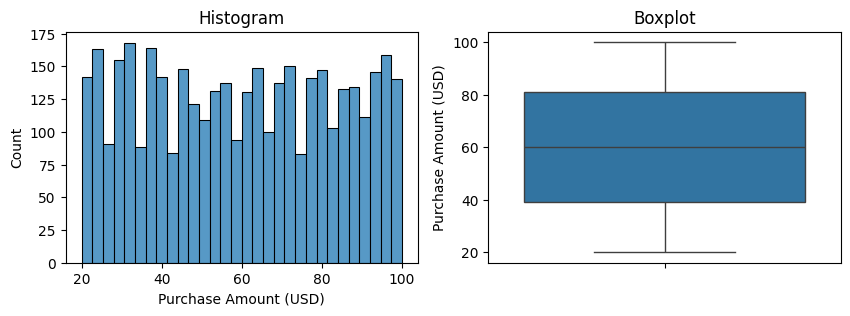

Skewness: 0.012701757626433795
Kurtosis: -1.236593691266159


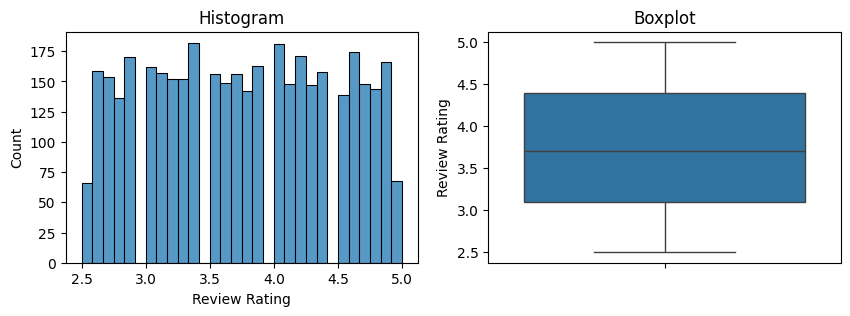

Skewness: 0.00452459644246527
Kurtosis: -1.1796283021299137


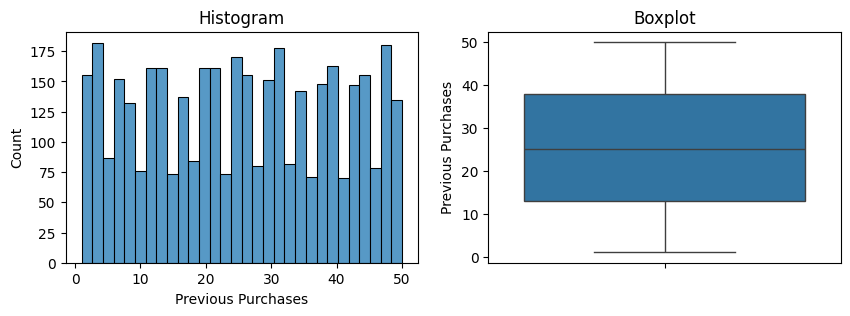

Skewness: 0.0031211555127652127
Kurtosis: -1.1901873846405375


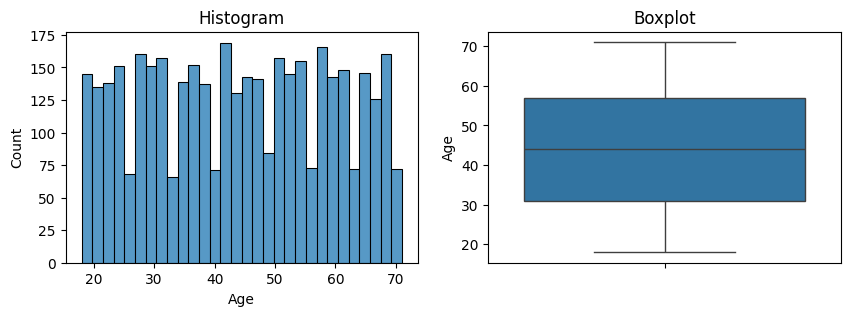

Skewness: -0.005946009489435315
Kurtosis: -1.193343768543865


In [80]:
# Make a plot to check distribution
def check_distribution_outliers(df, columns):
    for i in columns:
        plt.figure(figsize=(10, 3))

        # Histogram
        plt.subplot(1, 2, 1)
        sns.histplot(df[i], bins=30)
        plt.title('Histogram')

        # Boxplot
        plt.subplot(1, 2, 2)
        sns.boxplot(y=df[i])
        plt.title('Boxplot')

        plt.show()

        print('Skewness:', df[i].skew())
        print('Kurtosis:', df[i].kurt())

check_distribution_outliers(df[numerical_columns], numerical_columns)

All numerical columns have **no outliers** and follow a **normal distribution**.

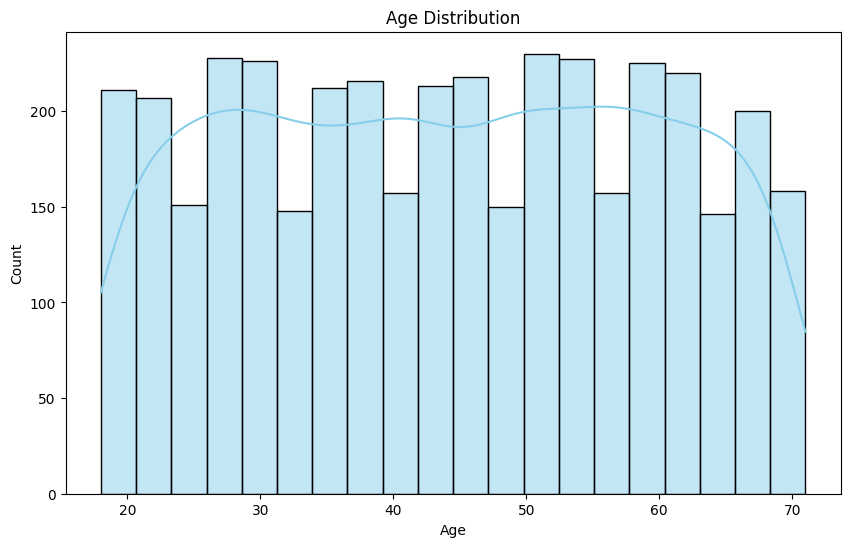

In [22]:
# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True, color="skyblue")
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

The graph shows that the age distribution is relatively uniform across most age groups, with counts ranging **consistently around 150–220 individuals** per group. This dataset appears to have a **fairly balanced** age distribution with some minor variations.

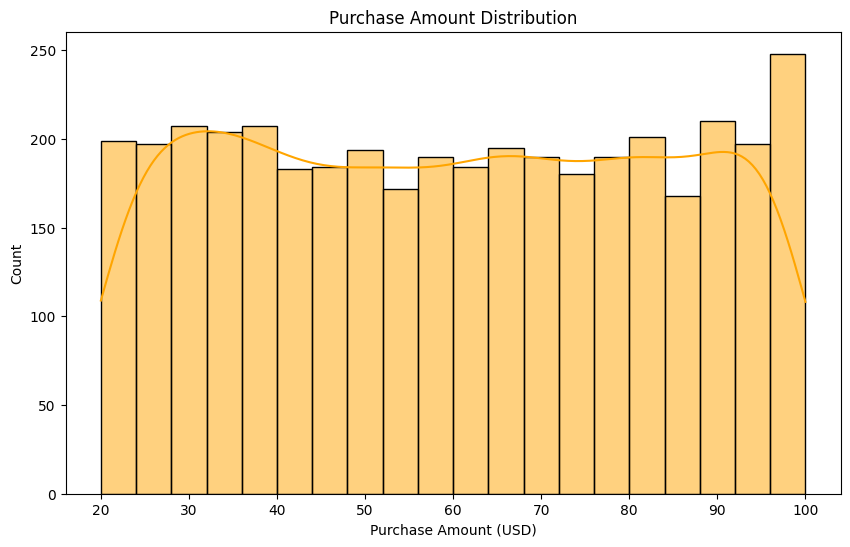

In [23]:
# Purchase Amount distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Purchase Amount (USD)'], bins=20, kde=True, color="orange")
plt.title('Purchase Amount Distribution')
plt.xlabel('Purchase Amount (USD)')
plt.ylabel('Count')
plt.show()

Most purchases range from $20 to $90, with a **fairly consistent** count of 150 to 200. There is a **clear peak** around $100, showing that this is a popular purchase amount, and a smaller peak near $30. The density line highlights these patterns, with a slight dip in the middle range. This indicates that while **purchase amounts are mostly consistent**, amounts like **$100 are more common**.

C:\Users\Asus\AppData\Local\Temp\ipykernel_5544\8818165.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='pastel')


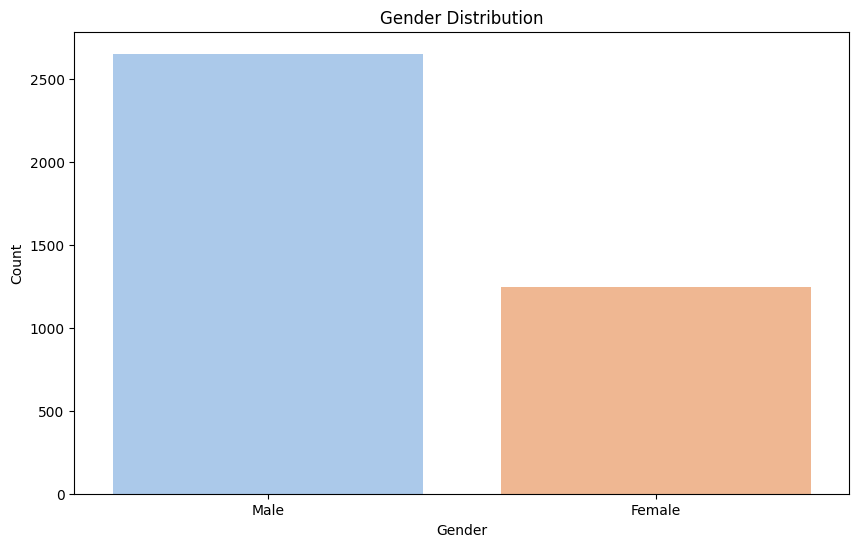

In [24]:
# Gender distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', data=df, palette='pastel')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In the gender distribution, there is a **significant difference** between the number of male and female customers. Male customers **far outnumber** female customers.

C:\Users\Asus\AppData\Local\Temp\ipykernel_5544\3811991687.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Frequency of Purchases', data=df, palette='viridis')


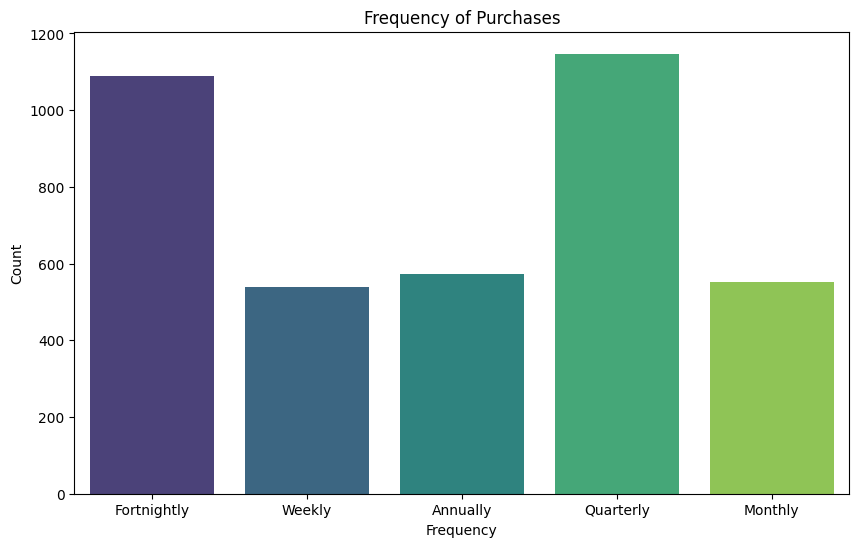

In [25]:
# Frequency of Purchases distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Frequency of Purchases', data=df, palette='viridis')
plt.title('Frequency of Purchases')
plt.xlabel('Frequency')
plt.ylabel('Count')
plt.show()

All categories have similar counts, with the range being around 500 to 600 purchases. The **Every 3 Months** category has the **highest count**, slightly surpassing the others, while **Weekly** and **Fortnightly** have marginally lower counts. This indicates a fairly uniform purchasing pattern across all time intervals, with a **slight preference** for purchases **every three months**.

C:\Users\Asus\AppData\Local\Temp\ipykernel_5544\4166595345.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Frequency of Purchases', y='Age', data=df, palette='coolwarm')


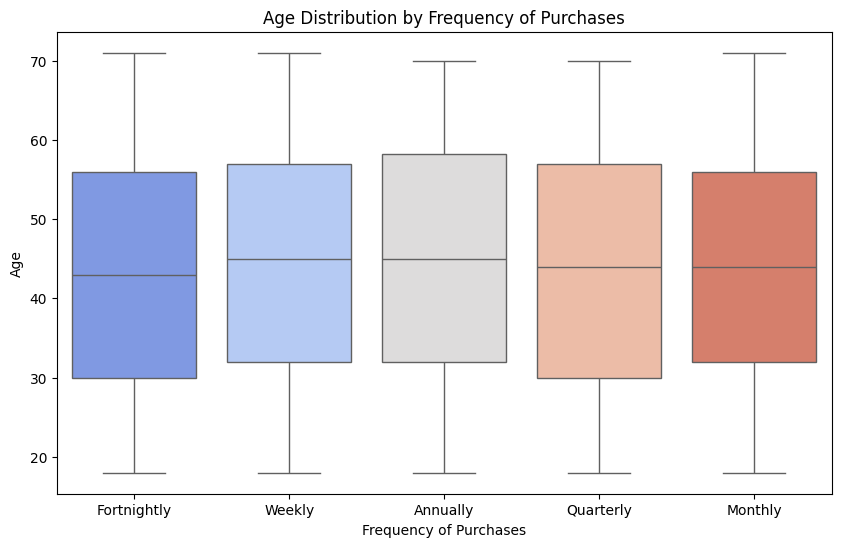

In [ ]:
# Age vs Frequency of Purchases (Boxplot)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Frequency of Purchases', y='Age', data=df, palette='coolwarm')
plt.title('Age Distribution by Frequency of Purchases')
plt.xlabel('Frequency of Purchases')
plt.ylabel('Age')
plt.show()

The medians across all groups are **fairly consistent**, primarily between the ages of 40 and 50, with similar variability in age. The age ranges, span from approximately 20 to 70 years across all purchase frequencies. This suggests that the company caters to a wide age group, regardless of purchase frequency, with **no extreme differences or outliers** between the groups.

C:\Users\Asus\AppData\Local\Temp\ipykernel_5544\365563564.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Purchase Amount (USD)', data=df, palette='Set2')


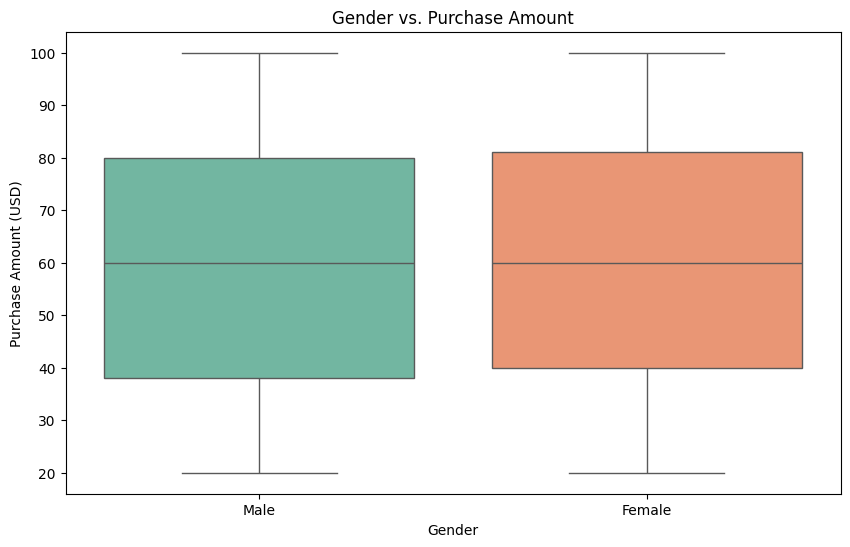

In [27]:
# Gender vs Purchase Amount (Boxplot)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Purchase Amount (USD)', data=df, palette='Set2')
plt.title('Gender vs. Purchase Amount')
plt.xlabel('Gender')
plt.ylabel('Purchase Amount (USD)')
plt.show()

Both genders have a **similar median spending of around $60**, with purchase amounts ranging from $20 to $100. Female customers show **slightly more variation** in their spending, as indicated by the wider box. Overall, there are **no significant** differences in spending habits between males and females.

## Correlation Pairplot

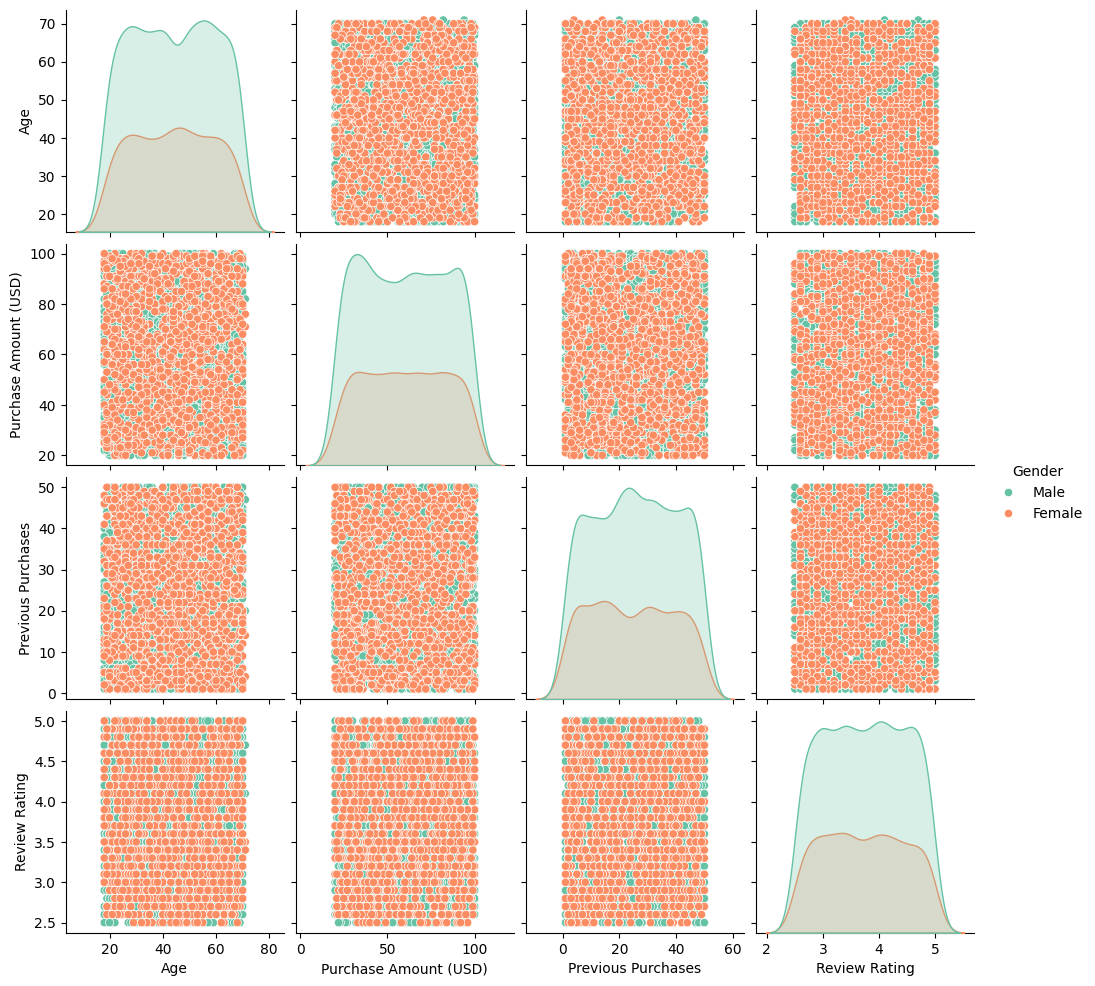

In [28]:
sns.pairplot(df, vars=['Age', 'Purchase Amount (USD)', 'Previous Purchases', 'Review Rating'],
             hue='Gender', palette='Set2', diag_kind='kde')
plt.show()

**Summary of Findings** :
- Scatterplots show **random distributions** with no significant relationships between variables.
- Gender **does not significantly affect** the distributions or relationships across variables.

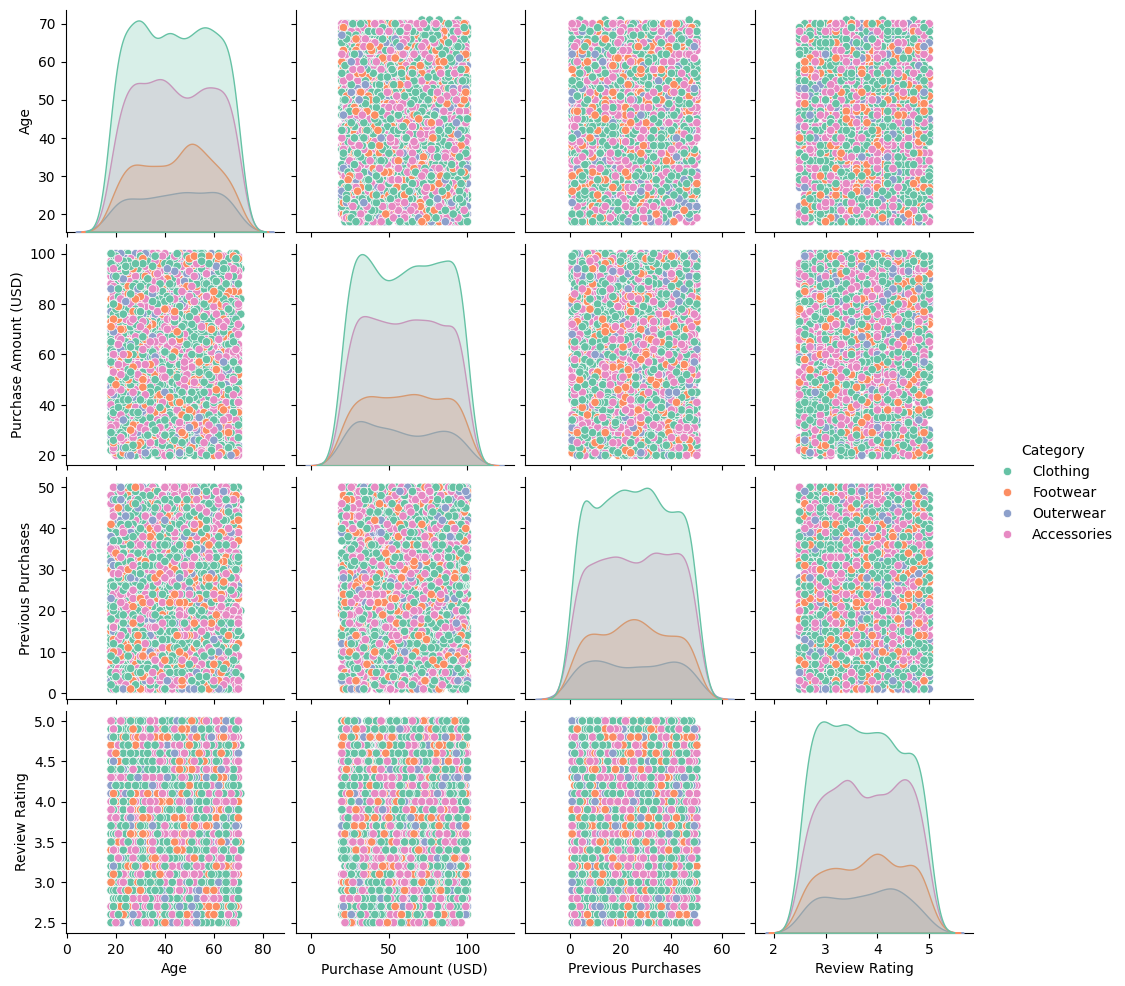

In [29]:
sns.pairplot(df, vars=['Age', 'Purchase Amount (USD)', 'Previous Purchases', 'Review Rating'],
             hue='Category', palette='Set2', diag_kind='kde')
plt.show()

**Summary of Findings** :
- Scatterplots show **random distributions** with no significant relationships between variables.
- Categories **does not significantly affect** the distributions or relationships across variables.

# Feature Engineering

In [81]:
# Display the Data
df.head()

Gender  Category  Purchase Amount (USD)       Location Size      Color  \
0   Male  Clothing                     53       Kentucky    L       Gray   
1   Male  Clothing                     64          Maine    L     Maroon   
2   Male  Clothing                     73  Massachusetts    S     Maroon   
3   Male  Footwear                     90   Rhode Island    M     Maroon   
4   Male  Clothing                     49         Oregon    M  Turquoise   

   Season  Review Rating Subscription Status Payment Method  Shipping Type  \
0  Winter            3.1                 Yes    Credit Card        Express   
1  Winter            3.1                 Yes  Bank Transfer        Express   
2  Spring            3.1                 Yes           Cash  Free Shipping   
3  Spring            3.5                 Yes         PayPal   Next Day Air   
4  Spring            2.7                 Yes           Cash  Free Shipping   

  Discount Applied Promo Code Used  Previous Purchases  \
0              Yes             Yes                  14   
1              Yes             Yes                   2   
2              Yes             Yes                  23   
3              Yes             Yes                  49   
4              Yes             Yes                  31   

  Preferred Payment Method Frequency of Purchases  Age  
0                    Venmo            Fortnightly   55  
1                     Cash            Fortnightly   19  
2              Credit Card                 Weekly   50  
3                   PayPal                 Weekly   21  
4                   PayPal               Annually   45

## Mapping Color

In [83]:
# Mapping of specific colors to general color categories
color_mapping = {
    'Olive': 'Green', 'Yellow': 'Yellow', 'Silver': 'Gray', 'Teal': 'Blue', 
    'Green': 'Green', 'Black': 'Black', 'Cyan': 'Blue', 'Violet': 'Purple',
    'Gray': 'Gray', 'Maroon': 'Red', 'Orange': 'Orange', 'Charcoal': 'Gray',
    'Pink': 'Pink', 'Magenta': 'Pink', 'Blue': 'Blue', 'Purple': 'Purple',
    'Peach': 'Orange', 'Red': 'Red', 'Beige': 'Brown', 'Indigo': 'Blue', 
    'Lavender': 'Purple', 'Turquoise': 'Blue', 'White': 'White', 
    'Brown': 'Brown', 'Gold': 'Yellow'
}

# Add a column for general color categories
df['Color'] = df['Color'].map(color_mapping)

There are too many colors in the dataset, using a single general color can **simplify** the visualization. This helps focus on the clusters or patterns in the data without being distracted by too many different colors.

In [84]:
# Count occurrences of each color
color_counts = df['Color'].value_counts()
print(color_counts)

Color
Blue      782
Gray      485
Purple    464
Green     346
Yellow    312
Red       306
Pink      305
Orange    303
Brown     288
Black     167
White     142
Name: count, dtype: int64


## Mapping Region

In [85]:
region_mapping = {
    'North America': ['Montana', 'Idaho', 'Illinois', 'Minnesota', 'Nebraska', 'North Dakota', 'New York', 'Vermont', 'Wisconsin', 'Michigan', 'Maine', 'New Hampshire', 'South Dakota', 'Iowa'],
    'West America': ['California', 'Nevada', 'Oregon', 'Washington', 'Alaska', 'Wyoming', 'Utah', 'Hawaii', 'Arizona'],
    'East America': ['Delaware', 'Maryland', 'New Jersey', 'Massachusetts', 'Rhode Island', 'Connecticut', 'Pennsylvania', 'New York'],
    'South America': ['Alabama', 'Louisiana', 'Mississippi', 'Georgia', 'Kentucky', 'Arkansas', 'North Carolina', 'Virginia', 'Tennessee', 'Texas', 'South Carolina', 'Florida'],
    'Midwest America': ['Ohio', 'Indiana', 'Missouri', 'West Virginia', 'Colorado', 'Oklahoma', 'Kansas']
}

def categorize_region(country):
    for region, countries in region_mapping.items():
        if country in countries:
            return region 
    return 'Others'

df['Location'] = df['Location'].apply(categorize_region)

There are too many location in the dataset, using a region by mapping the location can **simplify** the visualization. This helps focus on the clusters or patterns in the data without being distracted by too many different location.

In [86]:
# Count occurrences of each region
region_counts = df['Location'].value_counts()
print(region_counts)

Location
North America      1146
South America       943
West America        673
Midwest America     531
East America        526
Others               81
Name: count, dtype: int64


In [87]:
# Display the Data
df.head()

Gender  Category  Purchase Amount (USD)       Location Size Color  Season  \
0   Male  Clothing                     53  South America    L  Gray  Winter   
1   Male  Clothing                     64  North America    L   Red  Winter   
2   Male  Clothing                     73   East America    S   Red  Spring   
3   Male  Footwear                     90   East America    M   Red  Spring   
4   Male  Clothing                     49   West America    M  Blue  Spring   

   Review Rating Subscription Status Payment Method  Shipping Type  \
0            3.1                 Yes    Credit Card        Express   
1            3.1                 Yes  Bank Transfer        Express   
2            3.1                 Yes           Cash  Free Shipping   
3            3.5                 Yes         PayPal   Next Day Air   
4            2.7                 Yes           Cash  Free Shipping   

  Discount Applied Promo Code Used  Previous Purchases  \
0              Yes             Yes                  14   
1              Yes             Yes                   2   
2              Yes             Yes                  23   
3              Yes             Yes                  49   
4              Yes             Yes                  31   

  Preferred Payment Method Frequency of Purchases  Age  
0                    Venmo            Fortnightly   55  
1                     Cash            Fortnightly   19  
2              Credit Card                 Weekly   50  
3                   PayPal                 Weekly   21  
4                   PayPal               Annually   45

In [89]:
data = df.copy()
data.head()

Gender  Category  Purchase Amount (USD)       Location Size Color  Season  \
0   Male  Clothing                     53  South America    L  Gray  Winter   
1   Male  Clothing                     64  North America    L   Red  Winter   
2   Male  Clothing                     73   East America    S   Red  Spring   
3   Male  Footwear                     90   East America    M   Red  Spring   
4   Male  Clothing                     49   West America    M  Blue  Spring   

   Review Rating Subscription Status Payment Method  Shipping Type  \
0            3.1                 Yes    Credit Card        Express   
1            3.1                 Yes  Bank Transfer        Express   
2            3.1                 Yes           Cash  Free Shipping   
3            3.5                 Yes         PayPal   Next Day Air   
4            2.7                 Yes           Cash  Free Shipping   

  Discount Applied Promo Code Used  Previous Purchases  \
0              Yes             Yes                  14   
1              Yes             Yes                   2   
2              Yes             Yes                  23   
3              Yes             Yes                  49   
4              Yes             Yes                  31   

  Preferred Payment Method Frequency of Purchases  Age  
0                    Venmo            Fortnightly   55  
1                     Cash            Fortnightly   19  
2              Credit Card                 Weekly   50  
3                   PayPal                 Weekly   21  
4                   PayPal               Annually   45

It is used for plotting the characteristics of customer after I do the K-Means clustering.

## Encoding

In [90]:
ohe_enc = OneHotEncoder(sparse_output=False).set_output(transform="pandas")
bin_enc = LabelEncoder()

Encode all the **categorical columns** because the model can only learn from numerical values.

In [91]:
# Fit transform columns with label encoder
df['Gender'] = bin_enc.fit_transform(df[['Gender']])
df['Size'] = bin_enc.fit_transform(df[['Size']])
df['Subscription Status'] = bin_enc.fit_transform(df[['Subscription Status']])
df['Promo Code Used'] = bin_enc.fit_transform(df[['Promo Code Used']])
df['Discount Applied'] = bin_enc.fit_transform(df[['Discount Applied']])

c:\Users\Asus\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Asus\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Asus\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Asus\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\preprocessing\_label.py:114: D

For **Gender, Size, Subscription Status, and Promo Code Used** columns,  use label encoding because these columns contain only two distinct values.

In [92]:
# Apply one-hot encoding to the categorical columns
one_hot_encoded = ohe_enc.fit_transform(df[['Category', 'Location', 'Color', 'Season', 'Payment Method', 'Shipping Type', 'Preferred Payment Method', 'Frequency of Purchases']])

#Create a DataFrame with the one-hot encoded columns
#We use get_feature_names_out() to get the column names for the encoded data
one_hot_df = pd.DataFrame(one_hot_encoded, columns=ohe_enc.get_feature_names_out(['Category', 'Location', 'Color', 'Season', 'Payment Method', 'Shipping Type', 'Preferred Payment Method', 'Frequency of Purchases']))

# Concatenate the one-hot encoded dataframe with the original dataframe
df = pd.concat([df, one_hot_df], axis=1)

# Drop the original categorical columns
df = df.drop(columns=['Category', 'Location', 'Color', 'Season', 'Payment Method', 'Shipping Type', 'Preferred Payment Method', 'Frequency of Purchases'], axis=1)

Use one-hot encoding for the **Category, Location, Color, Season, Payment Method, Shipping Type, Preferred Payment Method, and Frequency of Purchases** columns because those column are independent and do not have any order or hierarchy.

In [93]:
# Display the Data
df.head()

Gender  Purchase Amount (USD)  Size  Review Rating  Subscription Status  \
0       1                     53     0            3.1                    1   
1       1                     64     0            3.1                    1   
2       1                     73     2            3.1                    1   
3       1                     90     1            3.5                    1   
4       1                     49     1            2.7                    1   

   Discount Applied  Promo Code Used  Previous Purchases  Age  \
0                 1                1                  14   55   
1                 1                1                   2   19   
2                 1                1                  23   50   
3                 1                1                  49   21   
4                 1                1                  31   45   

   Category_Accessories  ...  Preferred Payment Method_Cash  \
0                   0.0  ...                            0.0   
1                   0.0  ...                            1.0   
2                   0.0  ...                            0.0   
3                   0.0  ...                            0.0   
4                   0.0  ...                            0.0   

   Preferred Payment Method_Credit Card  Preferred Payment Method_Debit Card  \
0                                   0.0                                  0.0   
1                                   0.0                                  0.0   
2                                   1.0                                  0.0   
3                                   0.0                                  0.0   
4                                   0.0                                  0.0   

   Preferred Payment Method_PayPal  Preferred Payment Method_Venmo  \
0                              0.0                             1.0   
1                              0.0                             0.0   
2                              0.0                             0.0   
3                              1.0                             0.0   
4                              1.0                             0.0   

   Frequency of Purchases_Annually  Frequency of Purchases_Fortnightly  \
0                              0.0                                 1.0   
1                              0.0                                 1.0   
2                              0.0                                 0.0   
3                              0.0                                 0.0   
4                              1.0                                 0.0   

   Frequency of Purchases_Monthly  Frequency of Purchases_Quarterly  \
0                             0.0                               0.0   
1                             0.0                               0.0   
2                             0.0                               0.0   
3                             0.0                               0.0   
4                             0.0                               0.0   

   Frequency of Purchases_Weekly  
0                            0.0  
1                            0.0  
2                            1.0  
3                            1.0  
4                            0.0  

[5 rows x 57 columns]

## Scaling

In [94]:
std_scaler = StandardScaler()
df[numerical_columns] = std_scaler.fit_transform(df[numerical_columns])

I used **StandardScaler** because this dataset has a **normal distribution** and contains **very few outliers**.

In [95]:
# Display the Data
df.head()

Gender  Purchase Amount (USD)  Size  Review Rating  Subscription Status  \
0       1              -0.285629     0      -0.907584                    1   
1       1               0.178852     0      -0.907584                    1   
2       1               0.558882     2      -0.907584                    1   
3       1               1.276716     1      -0.349027                    1   
4       1              -0.454531     1      -1.466141                    1   

   Discount Applied  Promo Code Used  Previous Purchases       Age  \
0                 1                1           -0.785831  0.716171   
1                 1                1           -1.616552 -1.651114   
2                 1                1           -0.162789  0.387382   
3                 1                1            1.637107 -1.519598   
4                 1                1            0.391025  0.058592   

   Category_Accessories  ...  Preferred Payment Method_Cash  \
0                   0.0  ...                            0.0   
1                   0.0  ...                            1.0   
2                   0.0  ...                            0.0   
3                   0.0  ...                            0.0   
4                   0.0  ...                            0.0   

   Preferred Payment Method_Credit Card  Preferred Payment Method_Debit Card  \
0                                   0.0                                  0.0   
1                                   0.0                                  0.0   
2                                   1.0                                  0.0   
3                                   0.0                                  0.0   
4                                   0.0                                  0.0   

   Preferred Payment Method_PayPal  Preferred Payment Method_Venmo  \
0                              0.0                             1.0   
1                              0.0                             0.0   
2                              0.0                             0.0   
3                              1.0                             0.0   
4                              1.0                             0.0   

   Frequency of Purchases_Annually  Frequency of Purchases_Fortnightly  \
0                              0.0                                 1.0   
1                              0.0                                 1.0   
2                              0.0                                 0.0   
3                              0.0                                 0.0   
4                              1.0                                 0.0   

   Frequency of Purchases_Monthly  Frequency of Purchases_Quarterly  \
0                             0.0                               0.0   
1                             0.0                               0.0   
2                             0.0                               0.0   
3                             0.0                               0.0   
4                             0.0                               0.0   

   Frequency of Purchases_Weekly  
0                            0.0  
1                            0.0  
2                            1.0  
3                            1.0  
4                            0.0  

[5 rows x 57 columns]

# Dimensionality Reduction

In [96]:
pca = PCA()
pca.fit(df)

PCA()

Text(0, 0.5, 'Eigenvalues')

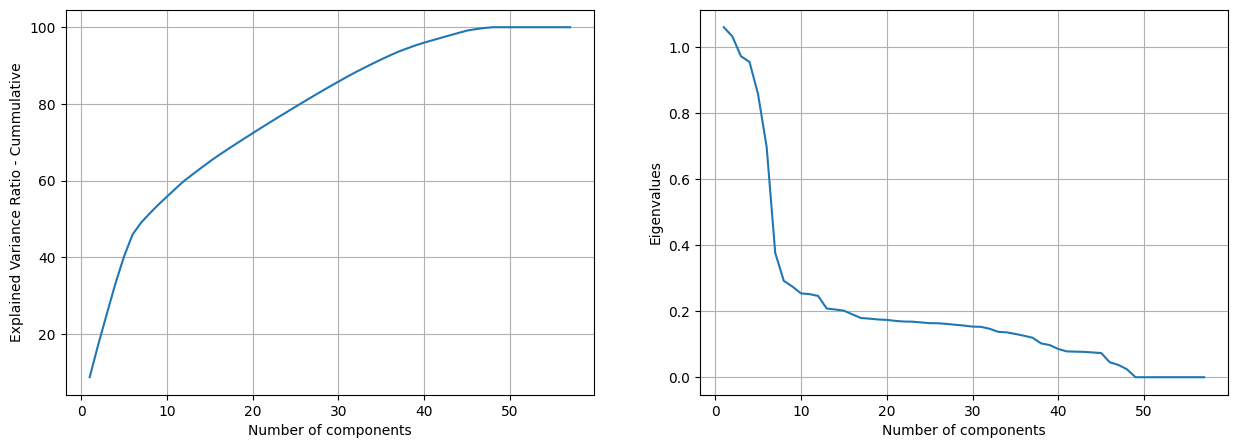

In [97]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.grid()
plt.plot(range(1, len(df.columns)+1), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained Variance Ratio - Cummulative')

plt.subplot(1, 2, 2)
plt.grid()
plt.plot(range(1, len(df.columns)+1), pca.explained_variance_ )
plt.xlabel('Number of components')
plt.ylabel('Eigenvalues')

Based on the eigenvalues graph, we can see that the eigenvalues start to drop sharply around the 3th component. Therefore, I chose **n_components = 3** because most of the variance is already explained by these components.

In [98]:
pca_comp = PCA(n_components=3)
df_pca = pca_comp.fit_transform(df)

In [99]:
df_pca

array([[ 1.02590294e+00, -8.32803832e-01,  5.94582261e-01],
       [-9.17796990e-01, -1.98738022e+00,  7.92524327e-01],
       [ 2.83056218e-01,  6.80003390e-04,  1.03283148e+00],
       ...,
       [ 1.33964084e+00, -1.14907728e+00, -4.99182078e-02],
       [-6.25225158e-01,  3.55156193e-01,  5.15414842e-01],
       [ 5.56492026e-01,  6.11689779e-01,  1.18142873e+00]])

# K-Means Clustering

In [100]:
distortions = []
silhouettes = []
K = range(2,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k,random_state=SEED)
    cluster_label=kmeanModel.fit_predict(df_pca)
    #calculate silhouette_score for each cluster
    silhouette_avg = silhouette_score(df_pca, cluster_label)
    print(
        "For n_clusters =",k,
        "The average silhouette_score is :",silhouette_avg,
        )
    # kmeans inertia_ attribute is:  Sum of squared distances of samples #to their closest cluster center.
    distortions.append(kmeanModel.inertia_)
    silhouettes.append(silhouette_avg)

c:\Users\Asus\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 2 The average silhouette_score is : 0.24381649302854116


c:\Users\Asus\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 3 The average silhouette_score is : 0.2358860570853246


c:\Users\Asus\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 4 The average silhouette_score is : 0.2598202104932969


c:\Users\Asus\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 5 The average silhouette_score is : 0.24974654986171288


c:\Users\Asus\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 6 The average silhouette_score is : 0.26991001253478025


c:\Users\Asus\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 7 The average silhouette_score is : 0.25723141009826234


c:\Users\Asus\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 8 The average silhouette_score is : 0.2504168719323377


c:\Users\Asus\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 9 The average silhouette_score is : 0.24513290713611743


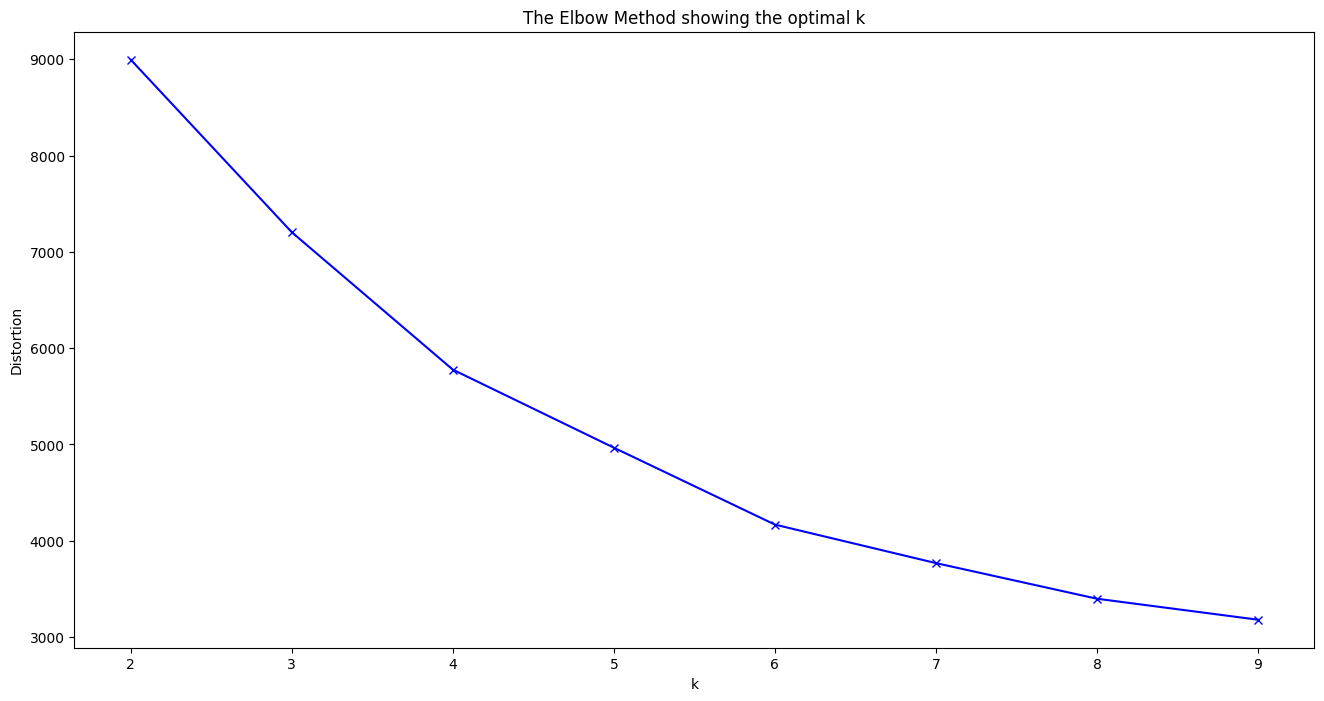

In [101]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

The Elbow Method shows an inflection point at **n_clusters = 6**. Therefore, I will start analyzing the Silhouette Score for n_clusters = 5, 6, 7, and choose the one with the **highest score** to determine the optimal number of clusters.

c:\Users\Asus\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 2 The average silhouette_score is : 0.24381649302854116


c:\Users\Asus\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 3 The average silhouette_score is : 0.2358860570853246


c:\Users\Asus\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 4 The average silhouette_score is : 0.2598202104932969


c:\Users\Asus\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 5 The average silhouette_score is : 0.24974654986171288


c:\Users\Asus\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 6 The average silhouette_score is : 0.26991001253478025


c:\Users\Asus\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 7 The average silhouette_score is : 0.25723141009826234


c:\Users\Asus\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 8 The average silhouette_score is : 0.2504168719323377


c:\Users\Asus\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 9 The average silhouette_score is : 0.24513290713611743


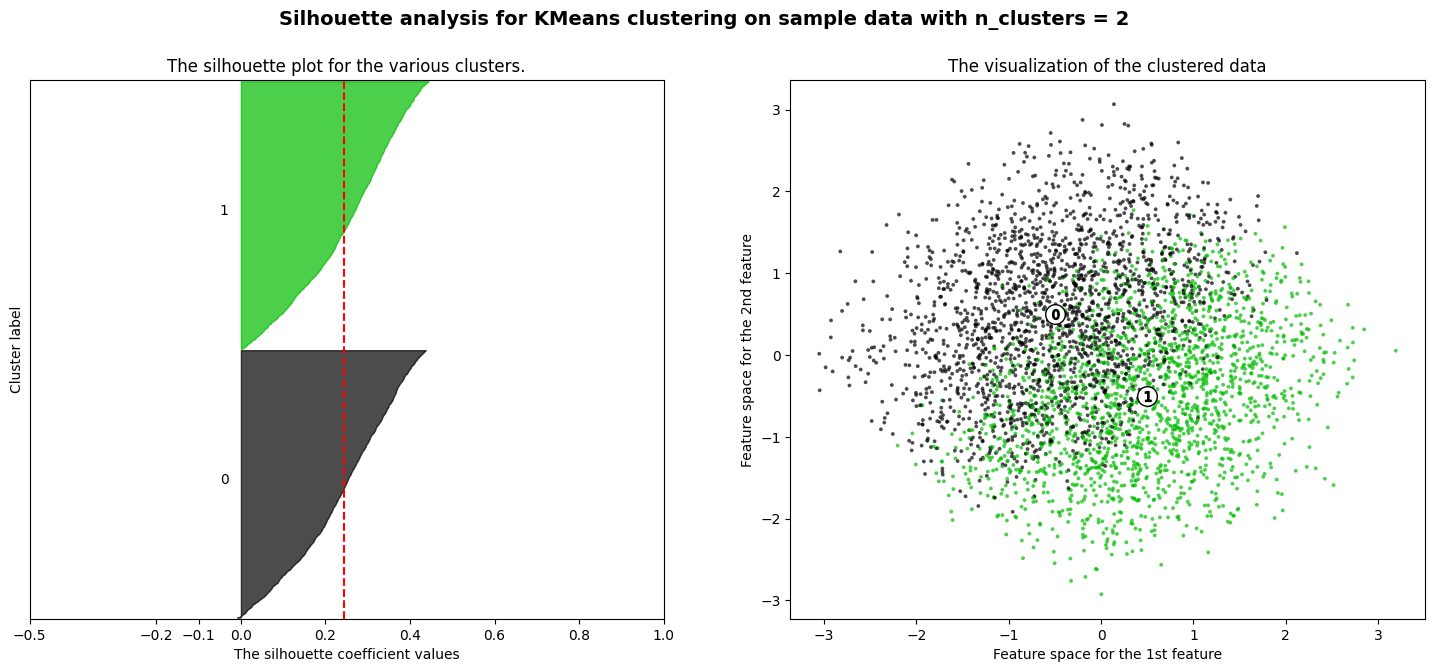

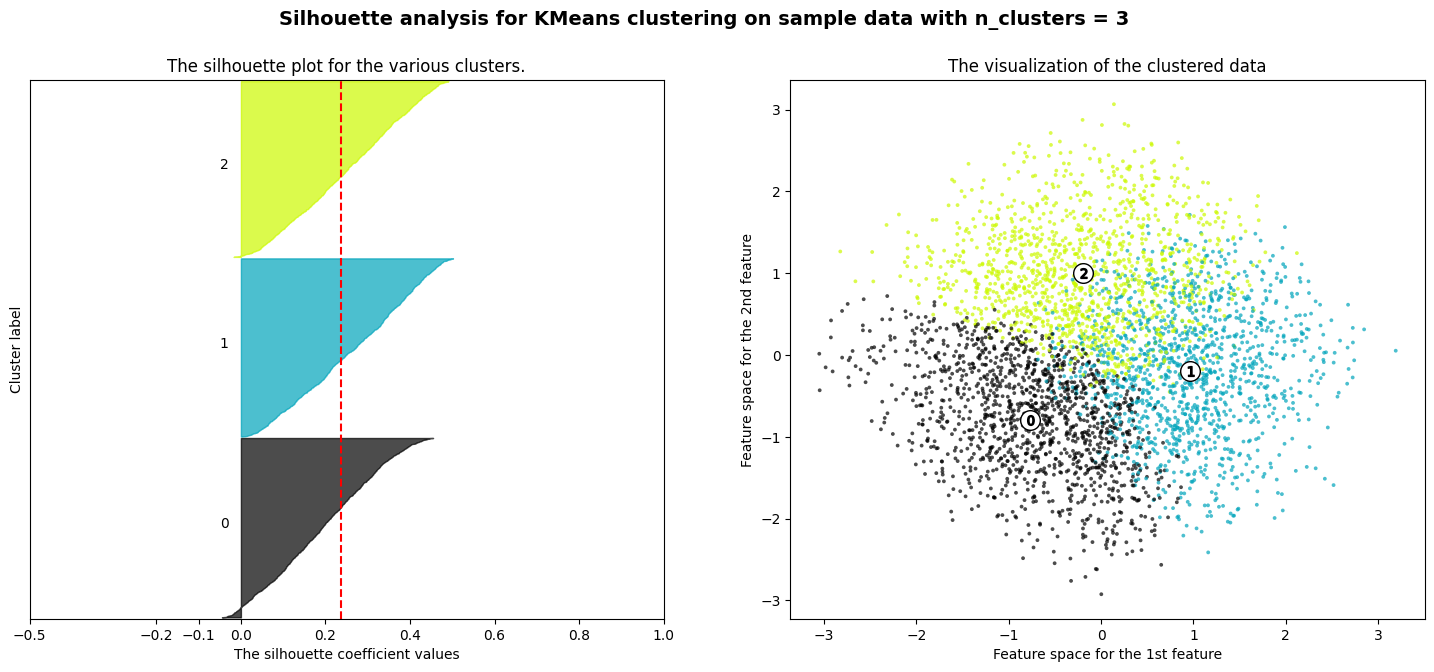

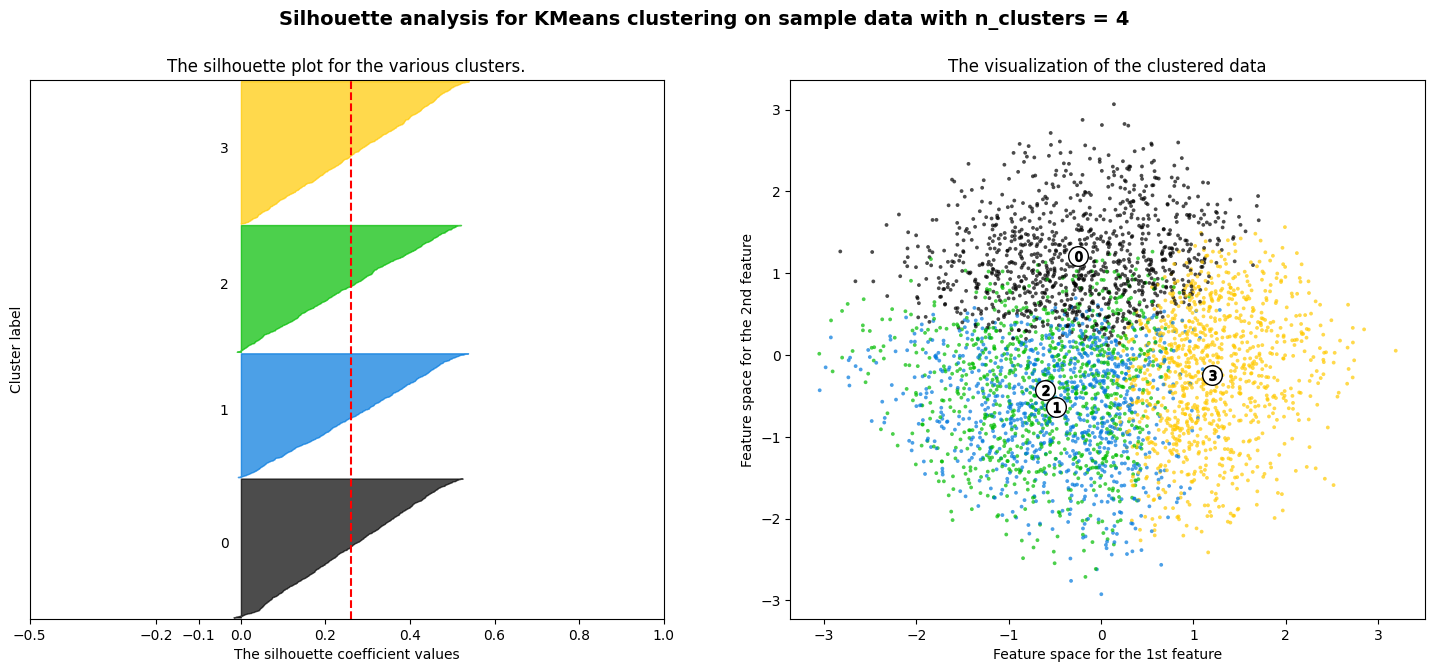

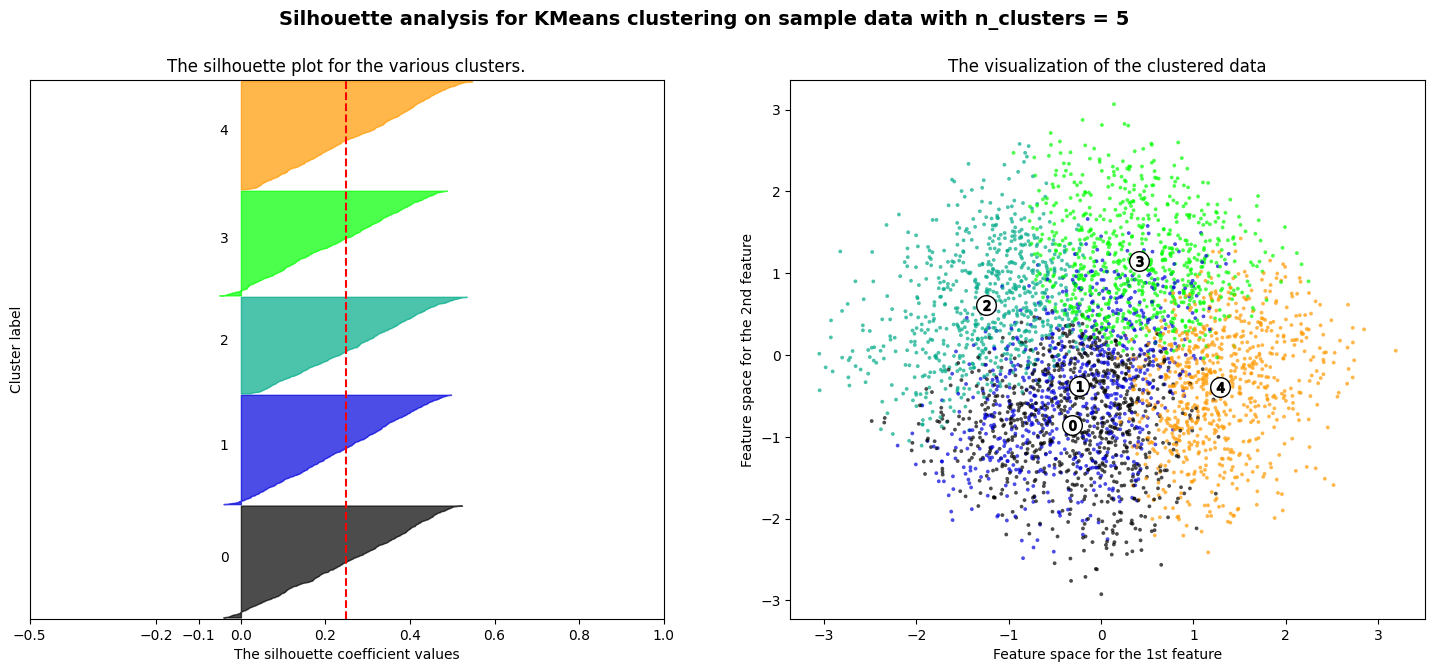

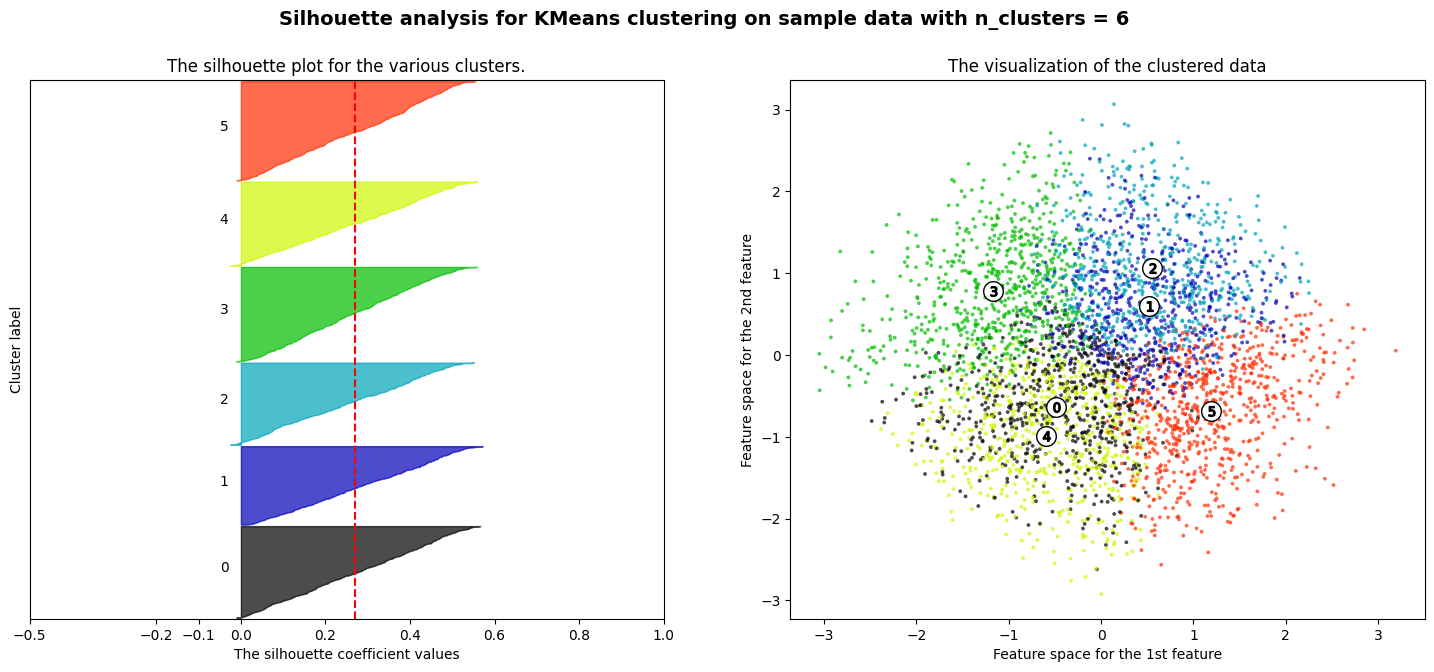

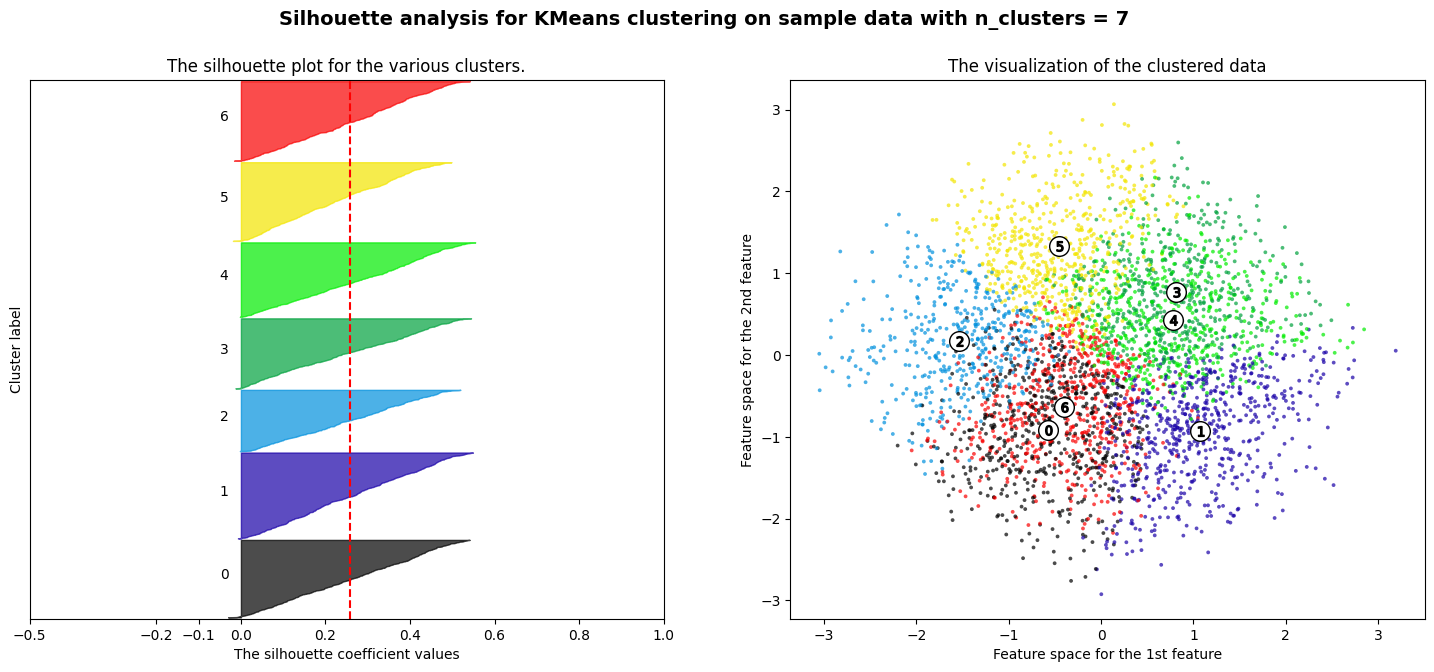

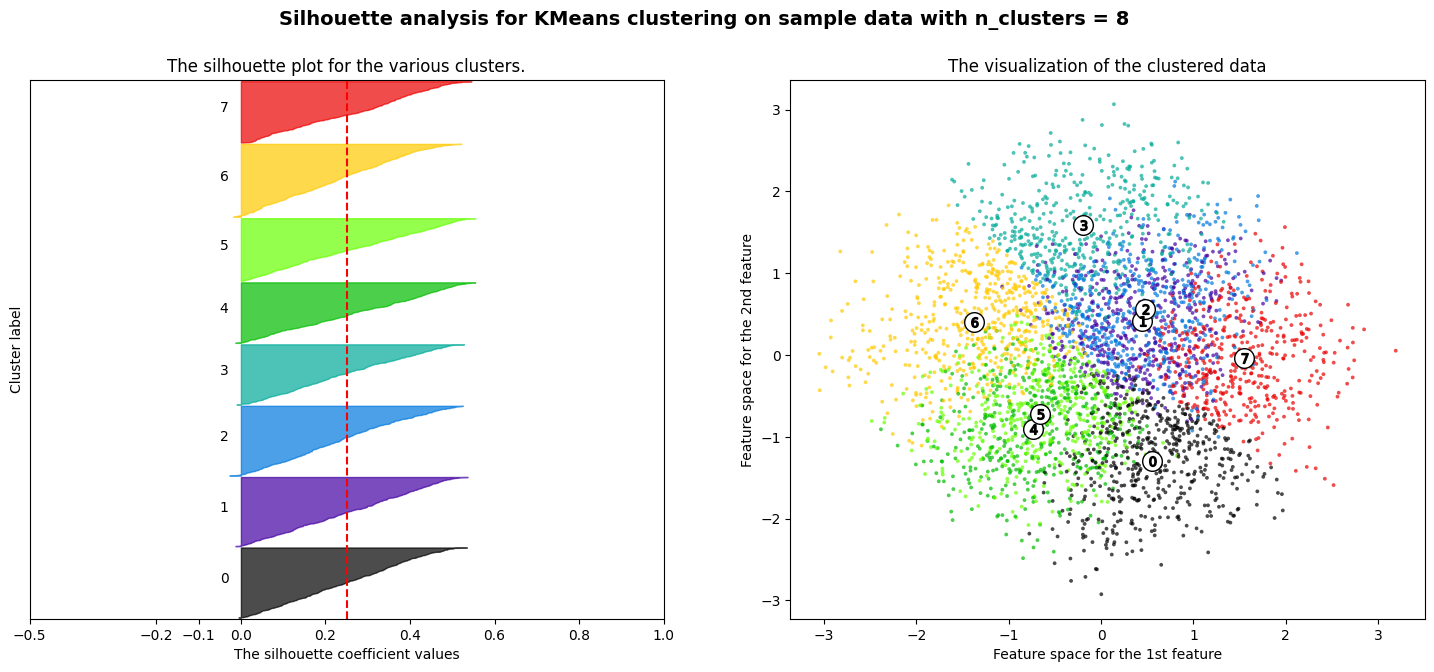

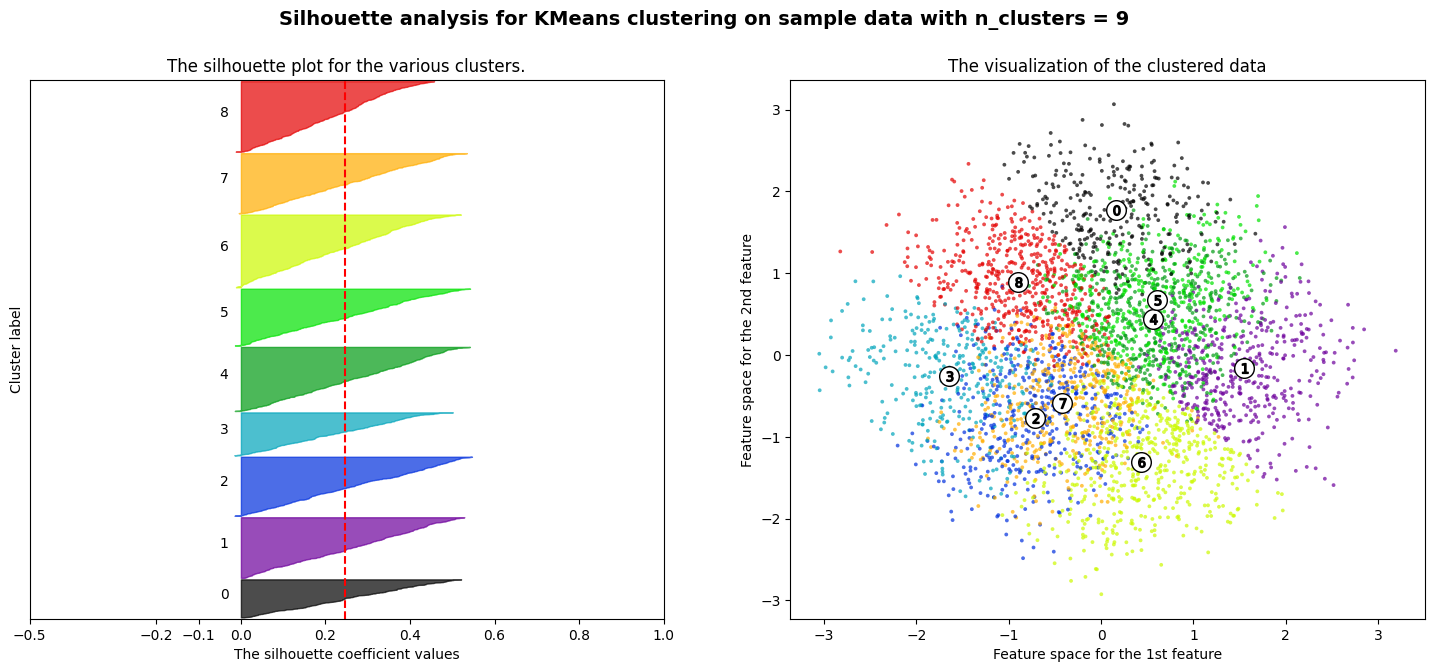

In [102]:
for n_clusters in K:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.5, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # Plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df_pca) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=SEED)
    cluster_labels = clusterer.fit_predict(df_pca)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df_pca, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_pca, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.5,-0.2,-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)

    pca_comp = PCA(n_components=2)
    df_pca_2 = pca_comp.fit_transform(df)

    ax2.scatter(
        df_pca_2[:, 0], df_pca_2[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

Based on the Silhouette Score, **n_clusters = 6** have the highest score (0.27).

## Fine-Tuning Model

c:\Users\Asus\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Asus\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Asus\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Asus\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kme

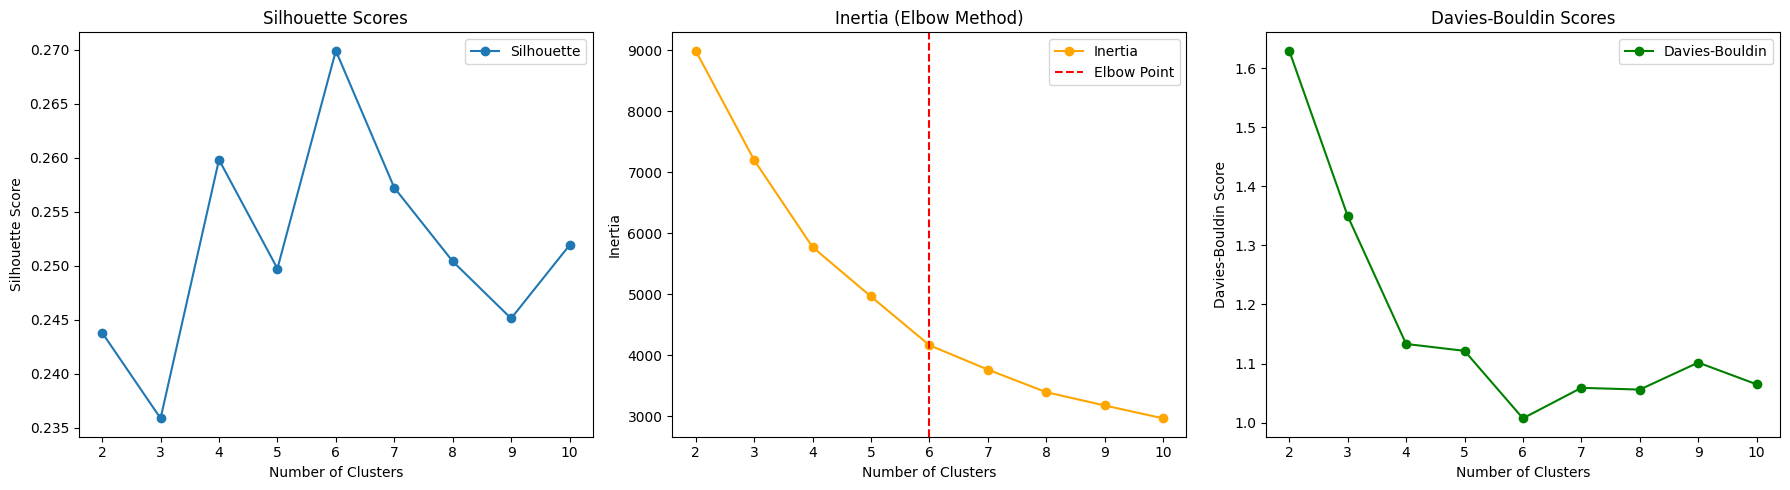

Optimal number of clusters based on silhouette score: 6
Optimal number of clusters based on Davies-Bouldin score: 6
Optimal number of clusters based on inertia (elbow method): 6


In [103]:
# Range of clusters to evaluate
cluster_range = range(2, 11)  # Adjust range based on your needs
silhouette_scores = []
inertia_values = []
davies_bouldin_scores = []

# Loop through the range to find the best number of clusters
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=SEED)
    cluster_labels = kmeans.fit_predict(df_pca)
    
    # Silhouette score
    silhouette_avg = silhouette_score(df_pca, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    
    # Inertia (Sum of squared distances to cluster centers)
    inertia_values.append(kmeans.inertia_)
    
    # Davies-Bouldin score (lower is better)
    davies_bouldin_avg = davies_bouldin_score(df_pca, cluster_labels)
    davies_bouldin_scores.append(davies_bouldin_avg)

# Find the elbow point using the KneeLocator library
elbow_locator = KneeLocator(cluster_range, inertia_values, curve="convex", direction="decreasing")
optimal_inertia = elbow_locator.knee

# Plot the results
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# Plot Silhouette Scores
ax[0].plot(cluster_range, silhouette_scores, marker='o', label="Silhouette")
ax[0].set_title('Silhouette Scores')
ax[0].set_xlabel('Number of Clusters')
ax[0].set_ylabel('Silhouette Score')
ax[0].legend()

# Plot Inertia (Elbow Method)
ax[1].plot(cluster_range, inertia_values, marker='o', color='orange', label="Inertia")
ax[1].axvline(optimal_inertia, color='red', linestyle='--', label="Elbow Point")
ax[1].set_title('Inertia (Elbow Method)')
ax[1].set_xlabel('Number of Clusters')
ax[1].set_ylabel('Inertia')
ax[1].legend()

# Plot Davies-Bouldin Scores
ax[2].plot(cluster_range, davies_bouldin_scores, marker='o', color='green', label="Davies-Bouldin")
ax[2].set_title('Davies-Bouldin Scores')
ax[2].set_xlabel('Number of Clusters')
ax[2].set_ylabel('Davies-Bouldin Score')
ax[2].legend()

plt.tight_layout()
plt.show()

# Determine optimal clusters based on silhouette score, Davies-Bouldin score, and inertia
optimal_silhouette = cluster_range[np.argmax(silhouette_scores)]
optimal_davies_bouldin = cluster_range[np.argmin(davies_bouldin_scores)]

print(f"Optimal number of clusters based on silhouette score: {optimal_silhouette}")
print(f"Optimal number of clusters based on Davies-Bouldin score: {optimal_davies_bouldin}")
print(f"Optimal number of clusters based on inertia (elbow method): {optimal_inertia}")

After we do the fine-tuning, we can see that the optimal number of cluster based on **silhouette score, Davies-Bouldin score, and inertia** is 6. 

In [104]:
model = KMeans(n_clusters = 6, random_state = SEED)
pred = model.fit_predict(df_pca)
df_kmeans = df.copy()
df_kmeans['cluster']=pred

c:\Users\Asus\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [105]:
print(df_kmeans)

      Gender  Purchase Amount (USD)  Size  Review Rating  Subscription Status  \
0          1              -0.285629     0      -0.907584                    1   
1          1               0.178852     0      -0.907584                    1   
2          1               0.558882     2      -0.907584                    1   
3          1               1.276716     1      -0.349027                    1   
4          1              -0.454531     1      -1.466141                    1   
...      ...                    ...   ...            ...                  ...   
3895       0              -1.341267     0       0.628448                    0   
3896       0              -0.454531     0       1.047366                    0   
3897       0              -1.130139     0      -1.186862                    0   
3898       0               0.727784     2       0.069891                    0   
3899       0               0.896686     1      -0.907584                    0   

      Discount Applied  Pro

<Axes: >

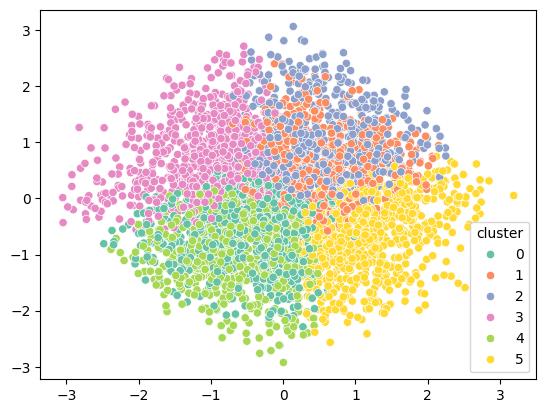

In [106]:
sns.scatterplot(x=df_pca[:,0], y=df_pca[:,1], hue=df_kmeans['cluster'], palette='Set2')

In [ ]:
# Count values for every cluster
df_kmeans['cluster'].value_counts()

cluster
5    730
3    695
0    673
4    618
2    605
1    579
Name: count, dtype: int64

## Characteristics of Each Customer Cluster

### Numerical Columns

In [114]:
# Add 'Cluster' column
data['Cluster'] = df_kmeans['cluster'].values

In [115]:
data.head()

Gender  Category  Purchase Amount (USD)       Location Size Color  Season  \
0   Male  Clothing                     53  South America    L  Gray  Winter   
1   Male  Clothing                     64  North America    L   Red  Winter   
2   Male  Clothing                     73   East America    S   Red  Spring   
3   Male  Footwear                     90   East America    M   Red  Spring   
4   Male  Clothing                     49   West America    M  Blue  Spring   

   Review Rating Subscription Status Payment Method  Shipping Type  \
0            3.1                 Yes    Credit Card        Express   
1            3.1                 Yes  Bank Transfer        Express   
2            3.1                 Yes           Cash  Free Shipping   
3            3.5                 Yes         PayPal   Next Day Air   
4            2.7                 Yes           Cash  Free Shipping   

  Discount Applied Promo Code Used  Previous Purchases  \
0              Yes             Yes                  14   
1              Yes             Yes                   2   
2              Yes             Yes                  23   
3              Yes             Yes                  49   
4              Yes             Yes                  31   

  Preferred Payment Method Frequency of Purchases  Age  Cluster  
0                    Venmo            Fortnightly   55        5  
1                     Cash            Fortnightly   19        0  
2              Credit Card                 Weekly   50        0  
3                   PayPal                 Weekly   21        3  
4                   PayPal               Annually   45        5

C:\Users\Asus\AppData\Local\Temp\ipykernel_5544\2782513036.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=fitur, data=data, showfliers=False, palette='Set2')
C:\Users\Asus\AppData\Local\Temp\ipykernel_5544\2782513036.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=fitur, data=data, showfliers=False, palette='Set2')
C:\Users\Asus\AppData\Local\Temp\ipykernel_5544\2782513036.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=fitur, data=data, showfliers=False, palette='Set2')
C:\Users\Asus

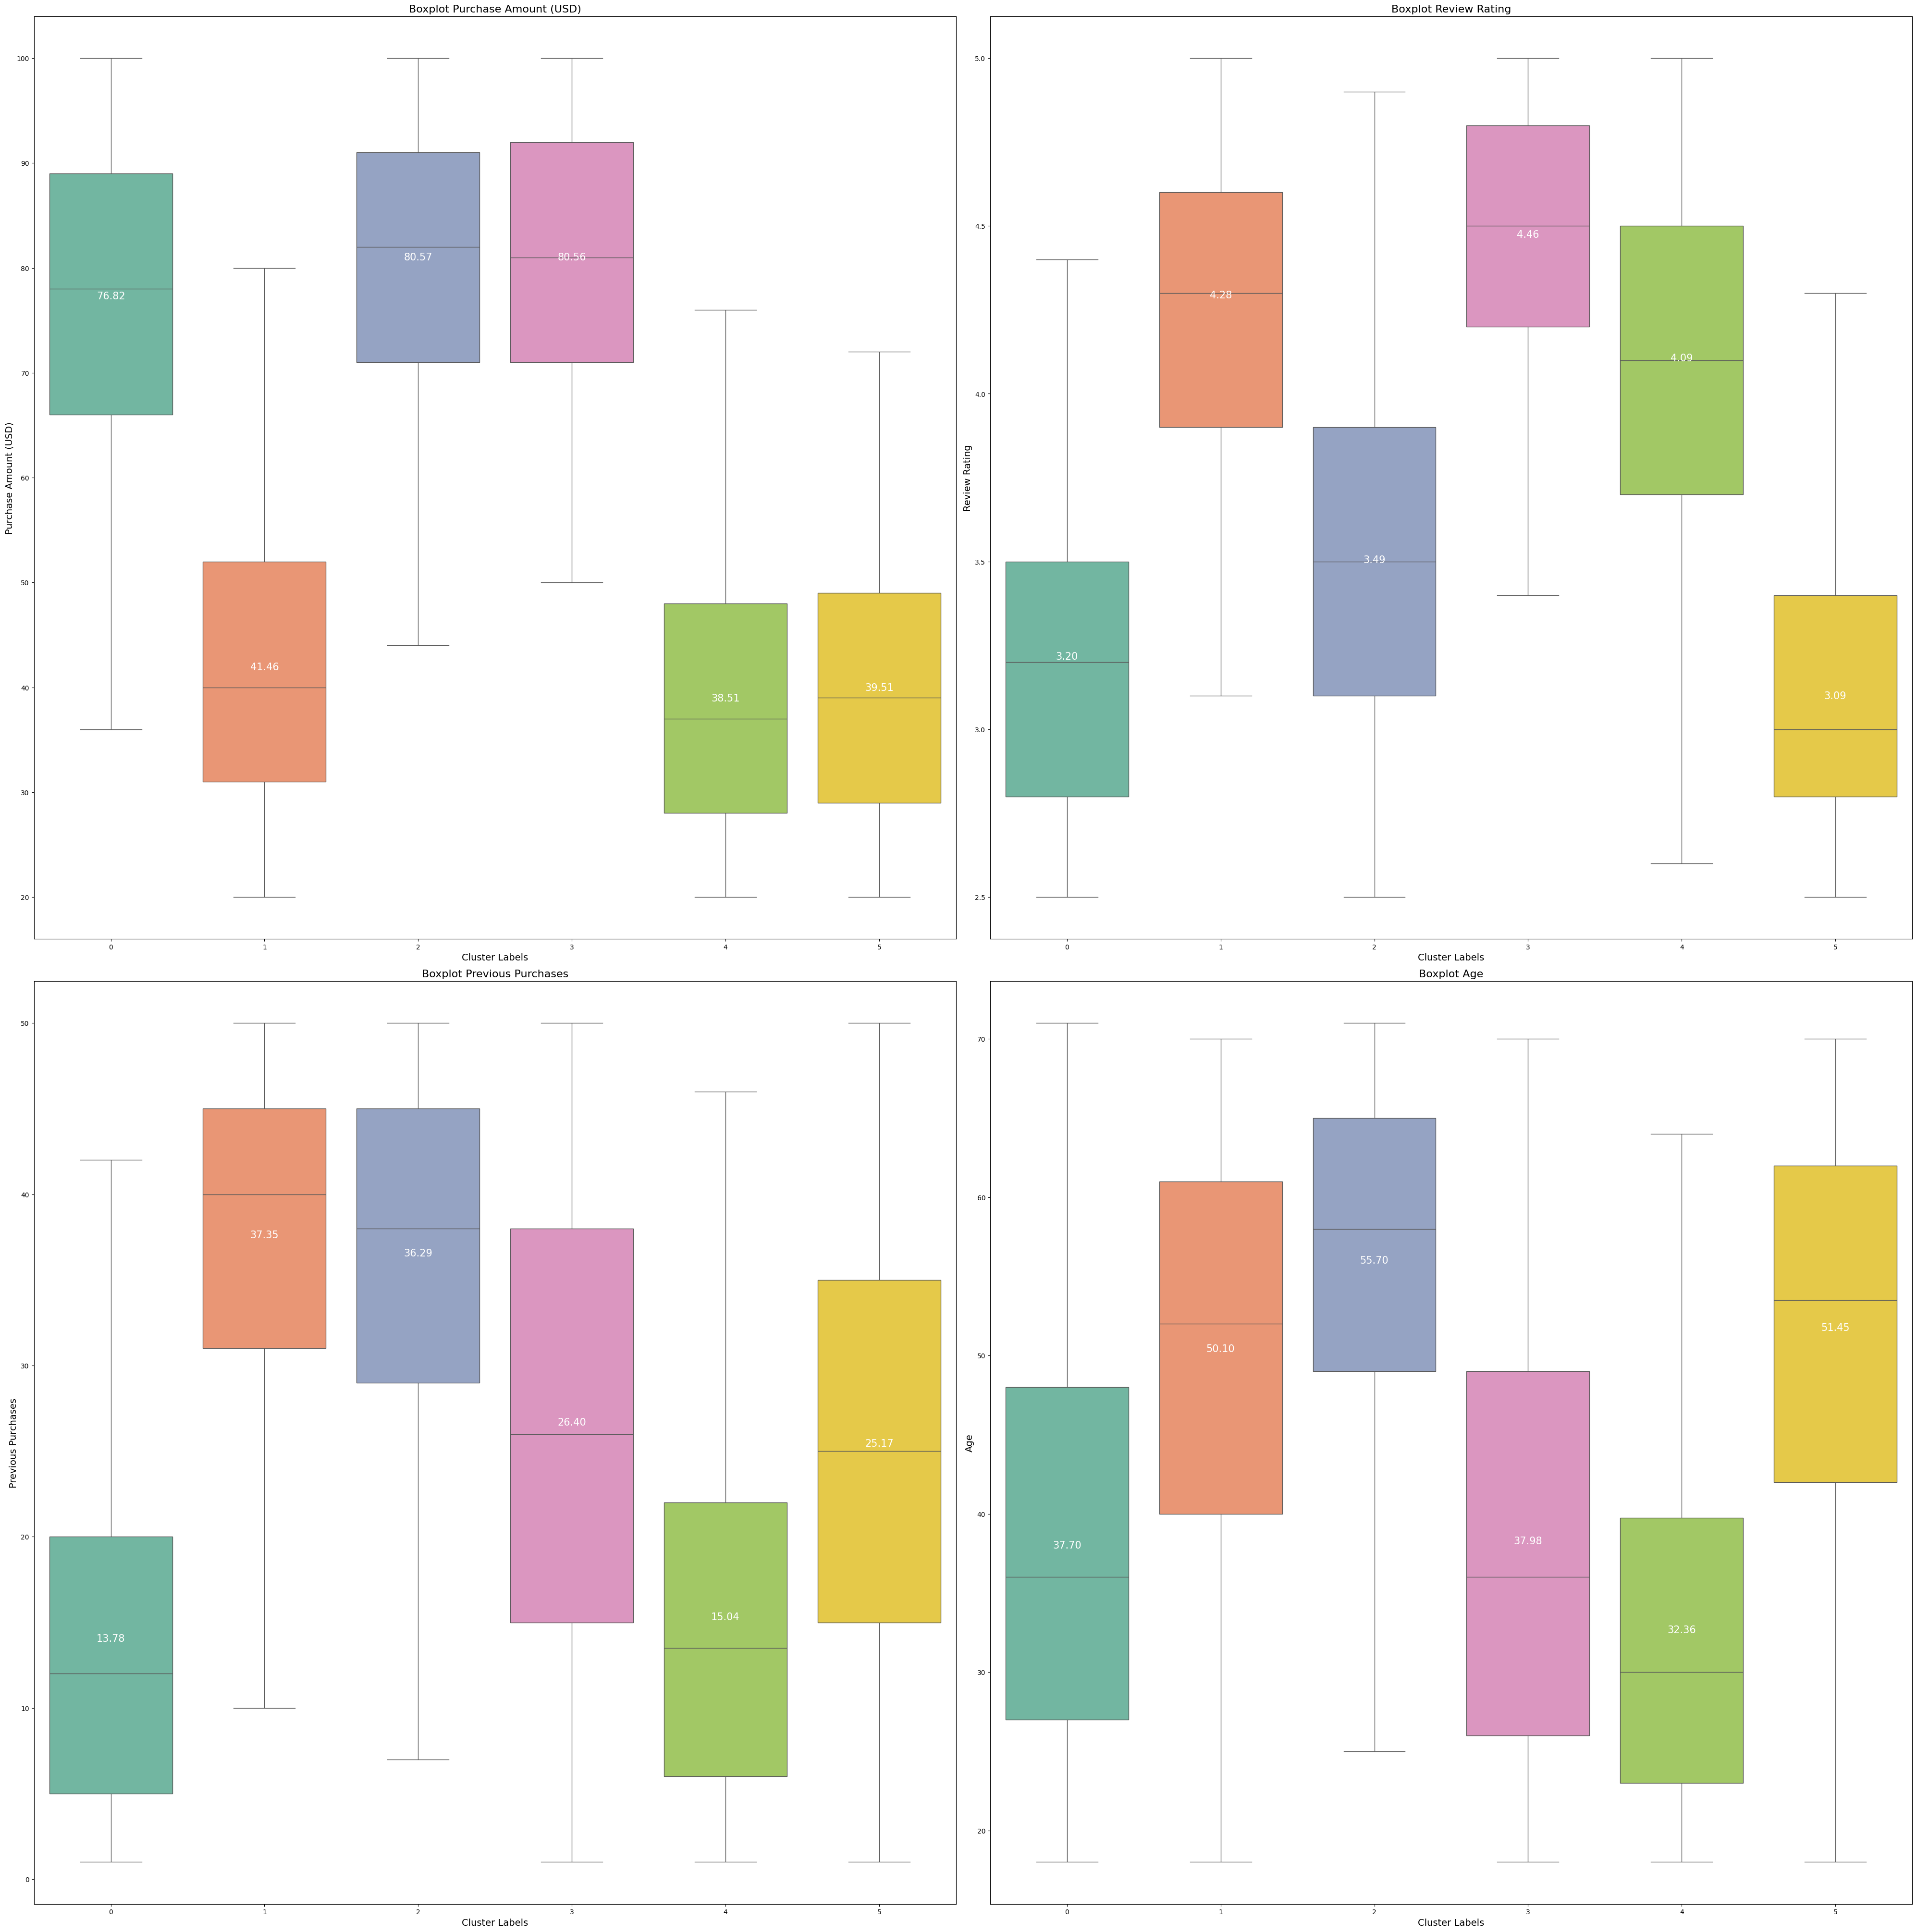

In [117]:
plt.figure(figsize=(40, 80))
for i, fitur in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns),2, i)
    sns.boxplot(x='Cluster', y=fitur, data=data, showfliers=False, palette='Set2')  
    plt.xlabel('Cluster Labels', fontsize=14)
    plt.ylabel(fitur, fontsize=14)
    plt.title(f'Boxplot {fitur}', fontsize=16)
    
    means = data.groupby('Cluster')[fitur].mean().values
    for j, mean in enumerate(means):
        plt.text(j, mean, f'{mean:.2f}', ha='center', va='bottom', color='white', fontsize=15)

plt.tight_layout()
plt.show()

**Summary of Customer Characteristics Based on Mean of Numerical Features**

**Cluster 0**
- **Purchase Amount** : 76.82 - Customers in this cluster tend to have moderately high purchase amounts compared to other clusters.
- **Review Rating** : 3.20 - This is the lowest review rating among all clusters, indicating relatively lower satisfaction or engagement with reviews.
- **Previous Purchases** : 13.78 – The frequency of prior purchases is the lowest, suggesting less frequent shopping activity.
- **Age** : 37.70 – The average age of this cluster indicates a group of adults in their late 30s.

**Characteristics** : Cluster 0 likely consists of younger, less engaged customers who occasionally make high-value purchases. Their low review rating could signify dissatisfaction or indifference towards leaving feedback.

**Cluster 1** :
- **Purchase Amount** : 41.46 – This is a relatively low purchase amount compared to other clusters.
- **Review Ratings** :  4.28 – Customers in this cluster provide high review ratings, suggesting higher satisfaction.
- **Previous Purchases** : 37.35 – The highest frequency of prior purchases across all clusters, indicating very active shoppers.
- **Age** : 50.10 – The average age places this cluster in the "older adult" category.

**Characteristics** : Cluster 1 represents loyal and highly engaged older customers who make frequent purchases but tend to spend smaller amounts per transaction. Their high review ratings suggest they are satisfied with their shopping experiences.

**Cluster 2** :
- **Purchase Amount** : 80.57 – The highest purchase amount across all clusters, indicating customers with significant spending habits.
- **Review Rating** : 3.49 – Ratings are higher than Cluster 0 but still on the lower end overall.
- **Previous Purchases** : 36.29 – This cluster demonstrates relatively high previous purchase activity.
- **Age** : 55.70 – This cluster has the oldest average age among all groups.

**Characteristics** : Cluster 2 consists of older customers who are heavy spenders and frequent shoppers but tend to leave lower ratings. This might indicate unmet expectations despite significant investments.

**Cluster 3** :
- **Purchase Amount** : 80.56 – Similar to Cluster 2, this cluster shows a high purchase amount.
- **Review Rating** : 4.46 – The highest review rating across all clusters, suggesting excellent satisfaction levels.
- **Previous Purchases** : 26.40 – A moderate level of previous purchase activity.
- **Age** : 37.98 – Customers in this cluster are mostly adults in their late 30s, similar to Cluster 0.

**Characteristics** : Cluster 3 represents high-value customers who are very satisfied with their shopping experience. They may not shop as frequently as others but contribute significantly through larger purchases and positive feedback.

**Cluster 4** :
- **Purchase Amount** : 38.51 – The lowest purchase amount among all clusters.
- **Review Rating** : 4.09 – Moderately high ratings, indicating reasonable satisfaction.
- **Previous Purchases** : 15.04 – A low frequency of previous purchases.
- **Age** : 32.36 – This cluster has the youngest average age, indicating younger customers.

**Characteristics** : Cluster 4 consists of younger, less frequent shoppers who spend minimally. Their moderate review ratings suggest that while their expectations are generally met, they might not be heavily invested in the shopping experience.

**Cluster 5** :
- **Purchase Amount** : 39.51 – A relatively low purchase amount, similar to Cluster 4.
- **Review Rating** : 3.09 – The lowest review rating among all clusters, indicating dissatisfaction or disengagement.
- **Previous Purchases** : 25.17 – A moderate level of prior shopping activity.
- **Age** : 51.45 – Customers in this cluster are primarily older adults.

**Characteristics** : Cluster 5 likely includes older customers who make moderate purchases but exhibit dissatisfaction, as reflected by the low review ratings. This cluster might require targeted efforts to improve their experience.

### Categorical Columns

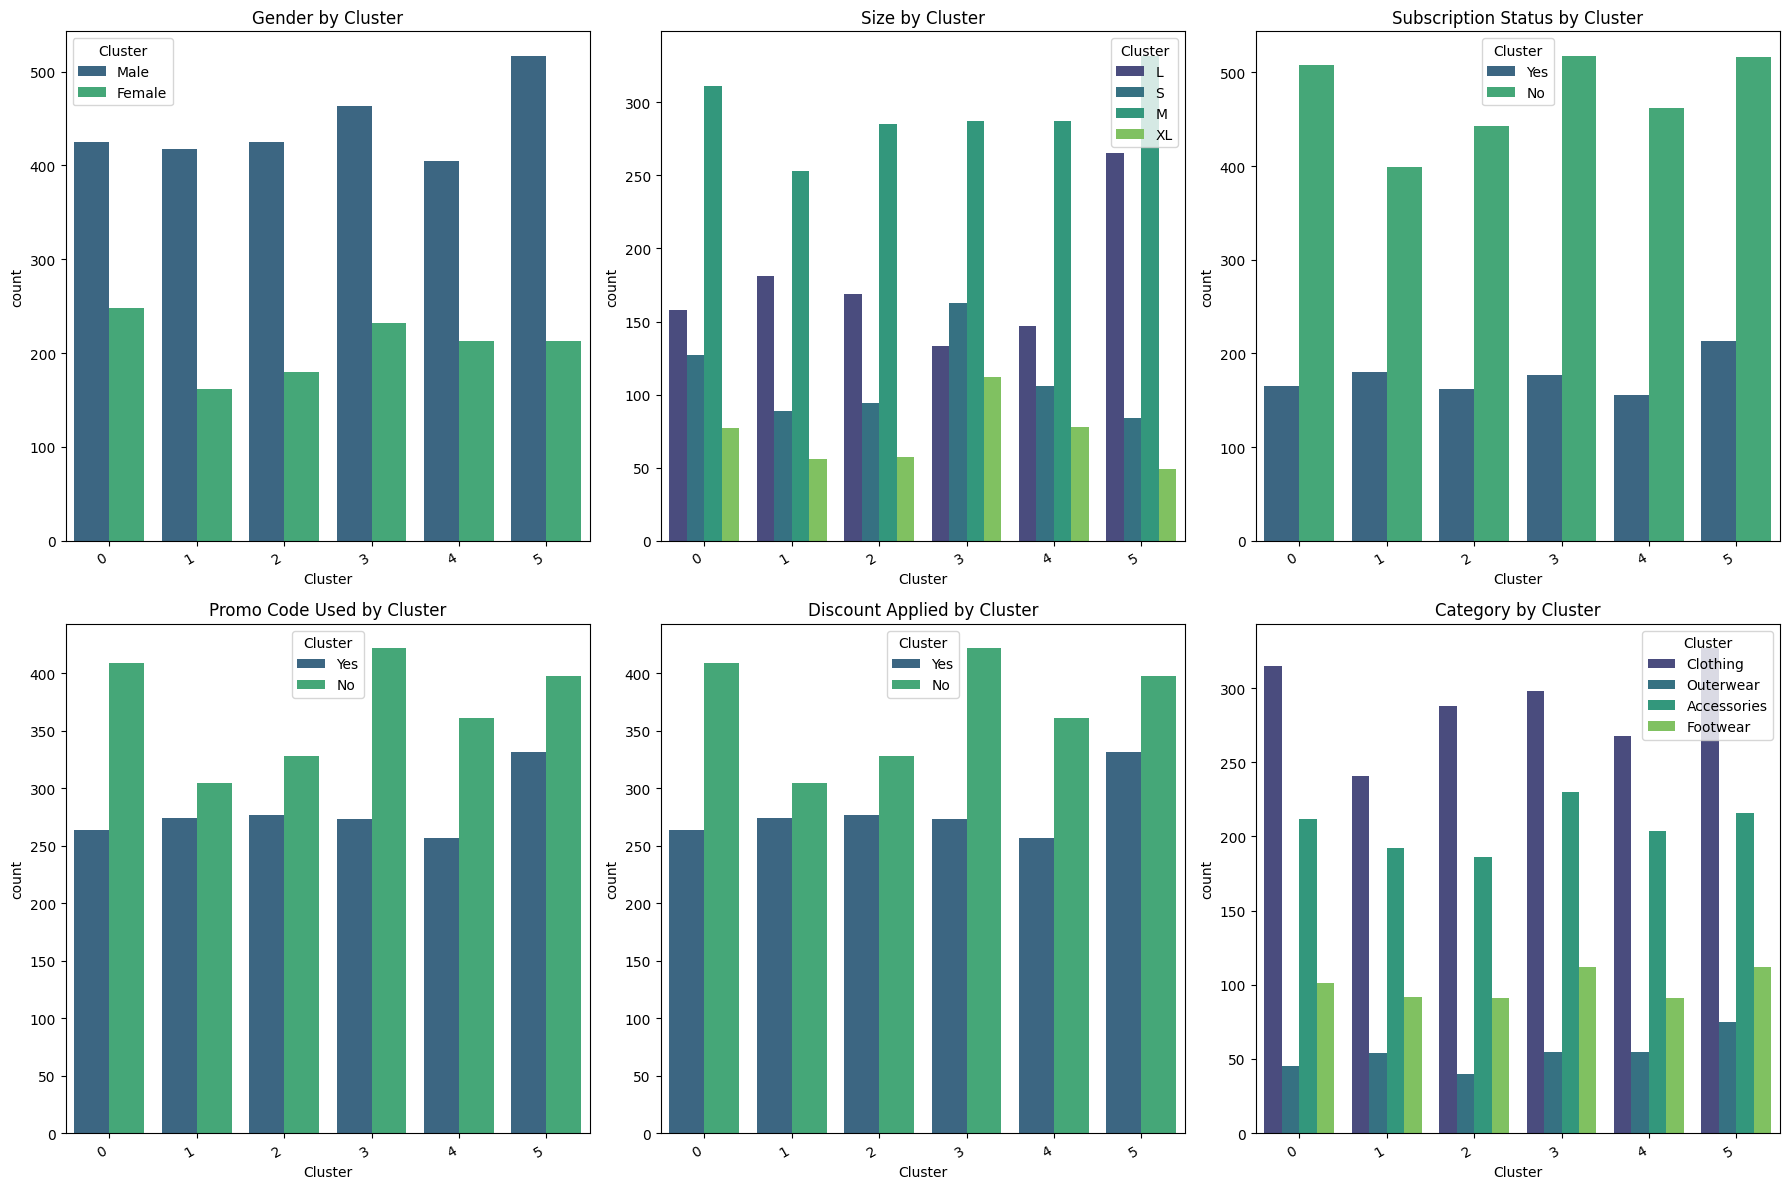

In [120]:
def cat_plot1(data, cat_cols, cluster_col):
    plt.figure(figsize=(18, 12))
    for i, col in enumerate(cat_cols, 1):
        plt.subplot(2, 3, i)  
        sns.countplot(data=data, x=cluster_col, hue=col, palette='viridis')
        plt.title(f"{col} by {cluster_col}")
        plt.xticks(rotation=30, ha='right')
        plt.legend(title="Cluster")
    plt.tight_layout()
    plt.show()

first_cols = ['Gender', 'Size', 'Subscription Status', 'Promo Code Used', 'Discount Applied', 'Category']
cat_plot1(data, first_cols, 'Cluster')

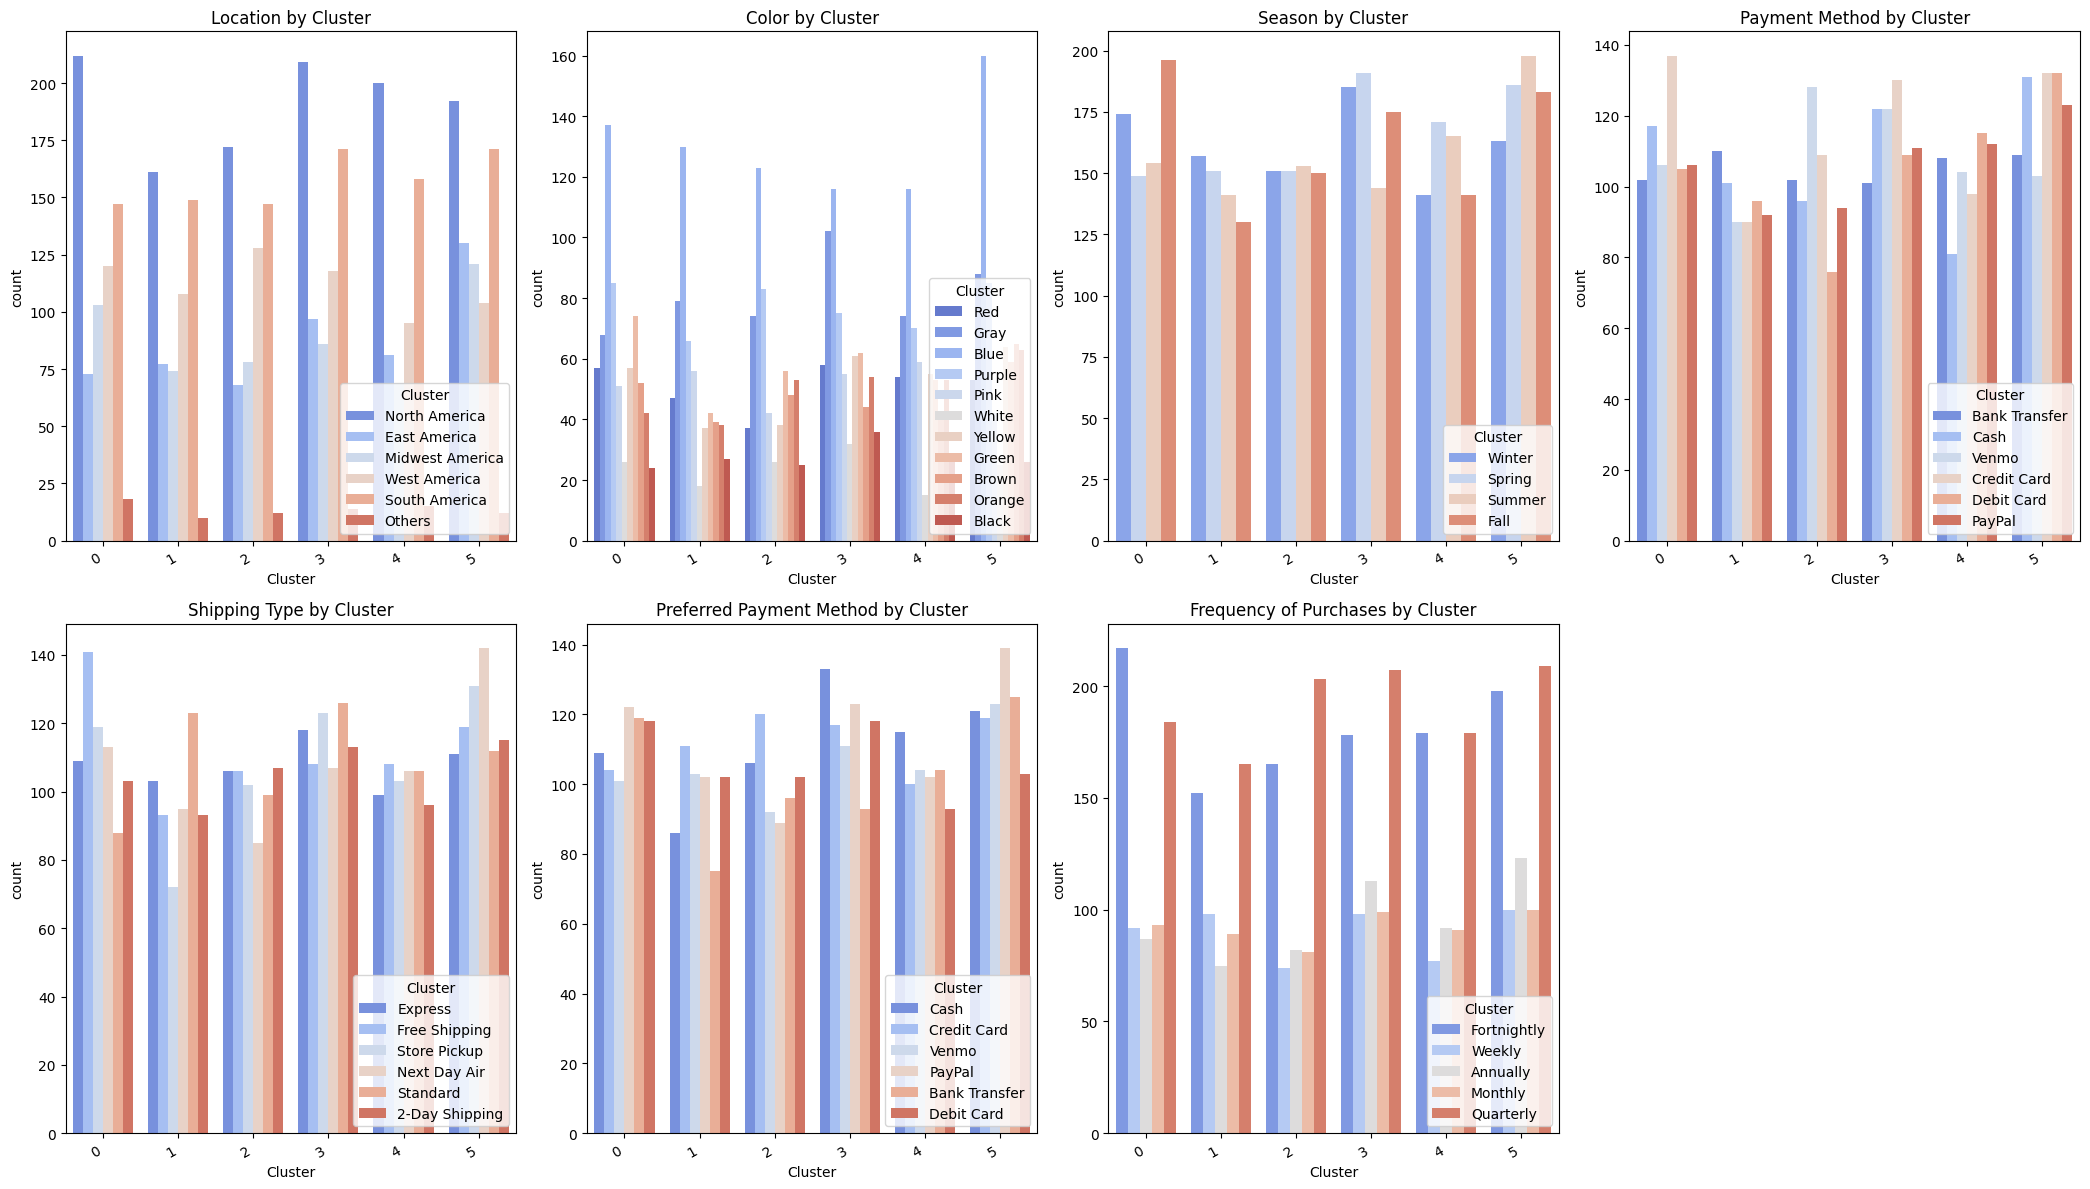

In [122]:
def cat_plot2(data, cat_cols, cluster_col):
    plt.figure(figsize=(21, 12))
    for i, col in enumerate(cat_cols, 1):
        plt.subplot(2, 4, i)  # Create a grid of 2 rows and 4 columns
        sns.countplot(data=data, x=cluster_col, hue=col, palette='coolwarm')
        plt.title(f"{col} by {cluster_col}")
        plt.xticks(rotation=30, ha='right')
        plt.legend(title="Cluster", loc='lower right', bbox_to_anchor=(1, 0))
    plt.tight_layout()
    plt.show()

second_cols = ['Location', 'Color', 'Season', 'Payment Method', 'Shipping Type', 'Preferred Payment Method', 'Frequency of Purchases']
cat_plot2(data, second_cols, 'Cluster')

From the plots above, it is evident that **none of the columns** have a significant impact on the clustering of customer characteristics. This conclusion is drawn from the observation that all the plotted features display **a similar distribution** across each cluster. In other words, the clusters do not exhibit distinctive differences in these features, suggesting that these variables **do not contribute meaningfully** to differentiating the customer groups.

### Identify Product Promotions

**Cluster 0**
- Attract occasional high spenders with time-sensitive discounts on premium products.
- Offer targeted discounts on items they’ve browsed or purchased before to increase engagement.
- Incentivize feedback to improve review ratings. For instance, “Leave a review and get 10% off your next purchase.”

**Cluster 1**
- Reward their frequent shopping with points, exclusive discounts, or VIP memberships.
- Encourage higher spending by bundling complementary products at discounted rates.
- Give early access to new collections or sales as a token of appreciation for their loyalty.

**Cluster 2**
- Highlight high-quality, premium products to align with their spending habits.
- Provide tailored offers such as “Get 20% off after your next 3 purchases.”

**Cluster 3**
- Offer limited-time discounts on premium or seasonal products.
- Promote limited-edition or seasonal collections to maintain their excitement and spending patterns.

**Cluster 4**
- Highlight affordable, trendy products aimed at younger customers.
- Offer discounts to encourage repeat shopping, such as “Get 15% off on your second purchase.”
- Engage this tech-savvy group with promotions on social platforms, influencer collaborations, or contests.

**Cluster 5**
- Emphasize the value and quality of products to rebuild trust, such as “Buy More, Save More” campaigns.
- Highlight improved services like free returns or faster shipping to regain trust and improve satisfaction.